# Titanic - Machine Learning from Disaster


## Import data
Install the library that isn't available on Anaconda

In [1]:
pip install fasteda missingno==0.5.2

Import the libries

In [2]:
import random
random.seed(2024)

import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer

from fasteda import fast_eda

%matplotlib inline

In [3]:
from google.colab import drive
import os
drive.mount('/content/drive')
source_path = '/content/drive/My Drive/titanic-machine-learning-from-disaster-main/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import data

In [4]:
train_data = pd.read_csv(os.path.join(source_path,'train.csv'))
test_data = pd.read_csv(os.path.join(source_path,'test.csv'))

## EDA
See training data

In [5]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Fast eda

DataFrame Head:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

DataFrame Tail:


PassengerId  Survived  Pclass                                      Name  \
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
MSNO Matrix:



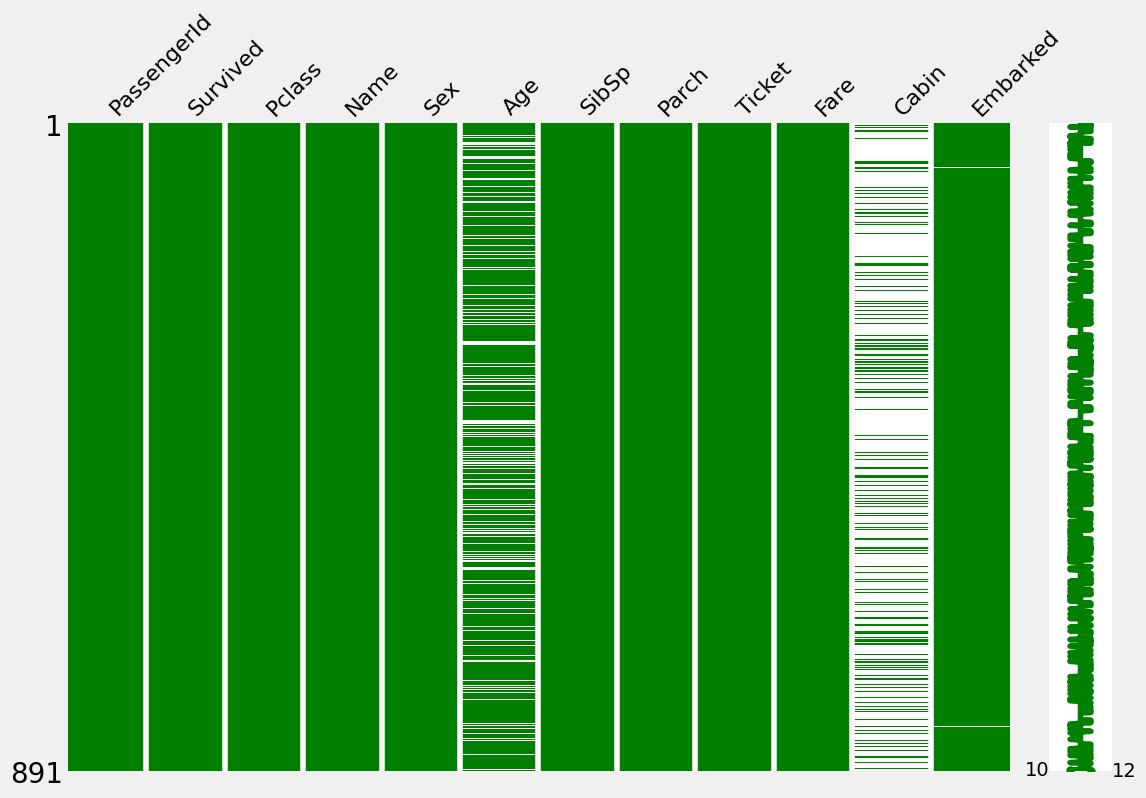

----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(891, 12)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83

/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'PassengerId    891
Survived       891
Pclass         891
Age            714
SibSp          891
Parch          891
Fare           891
Name: count, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'PassengerId       446
Survived        0.384
Pclass          2.309
Ag

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

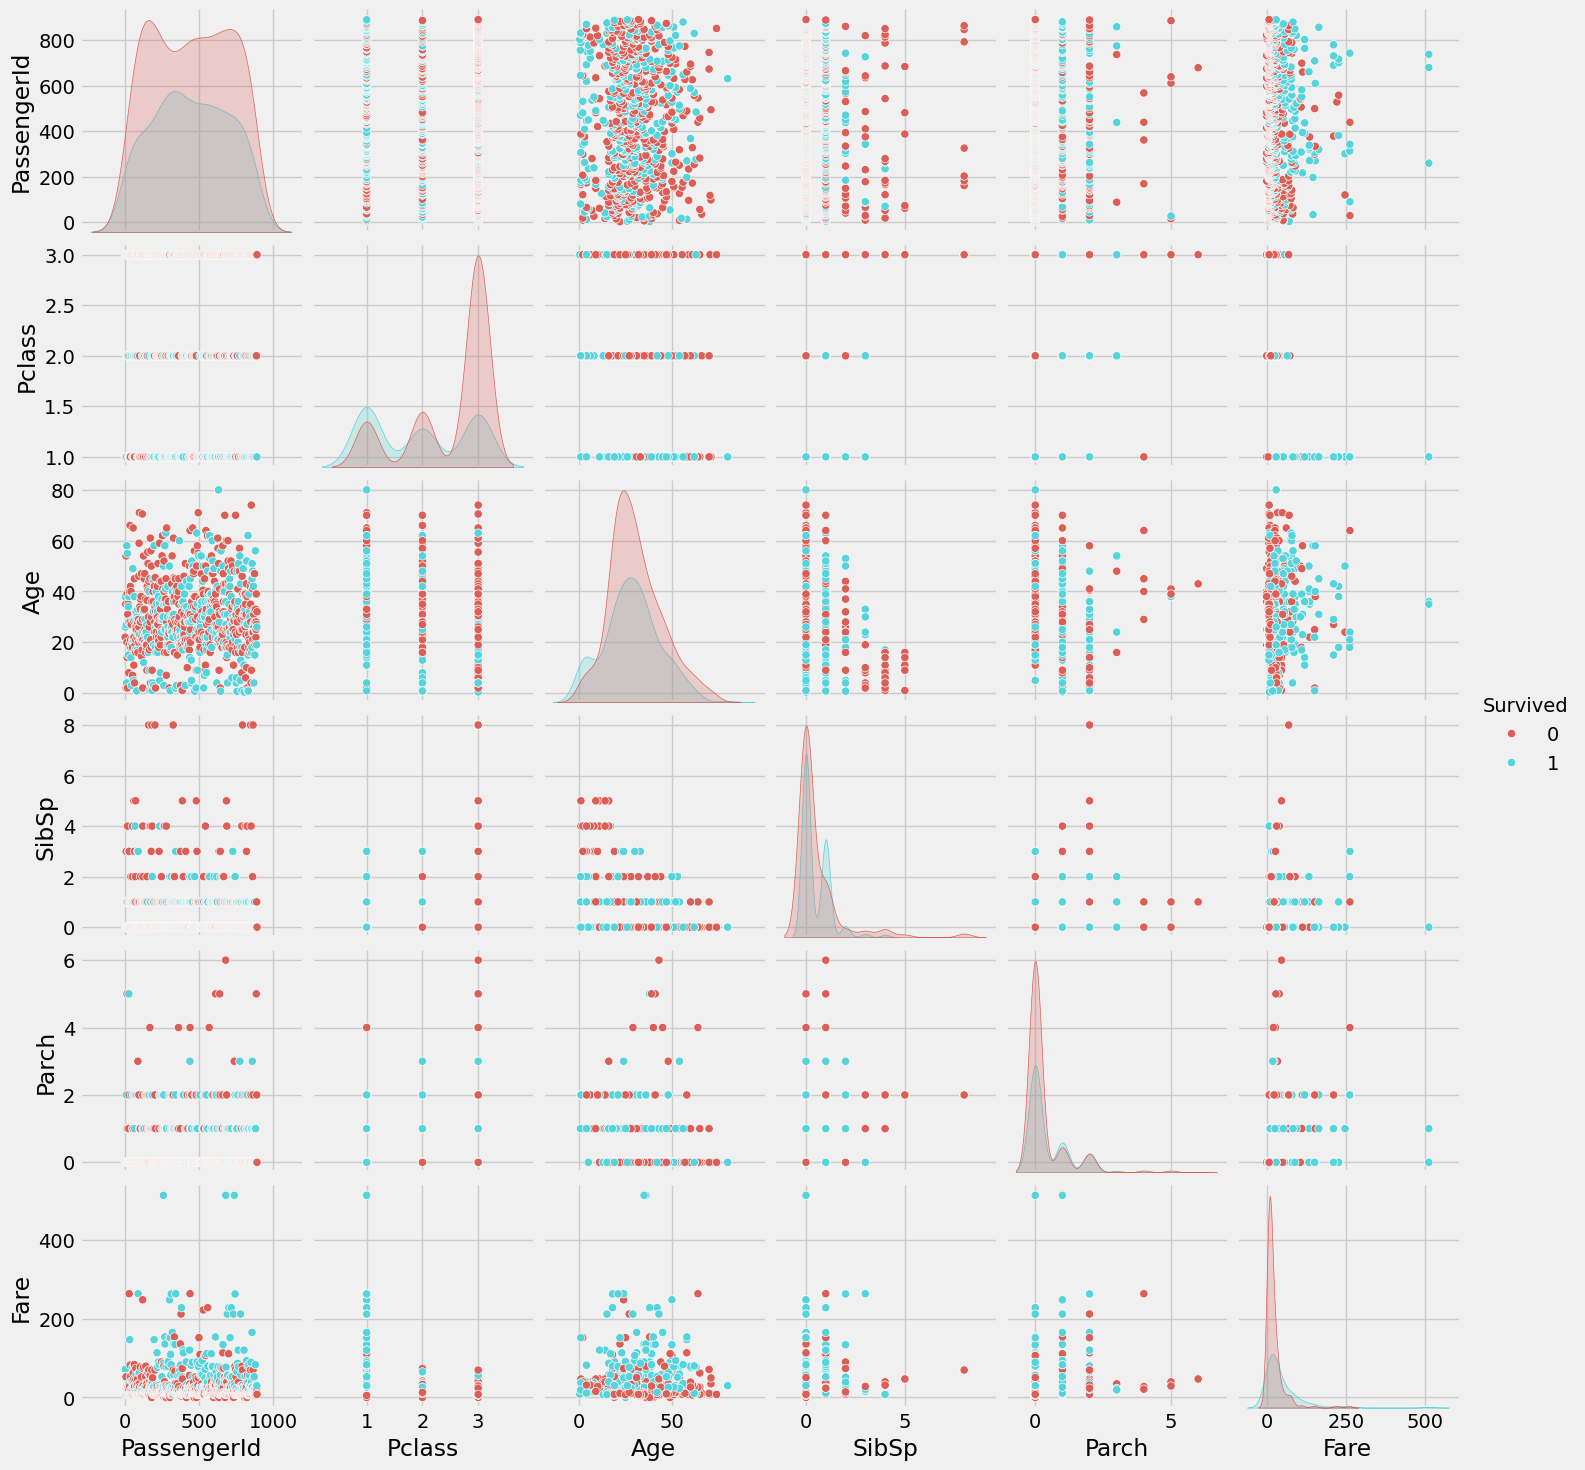

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


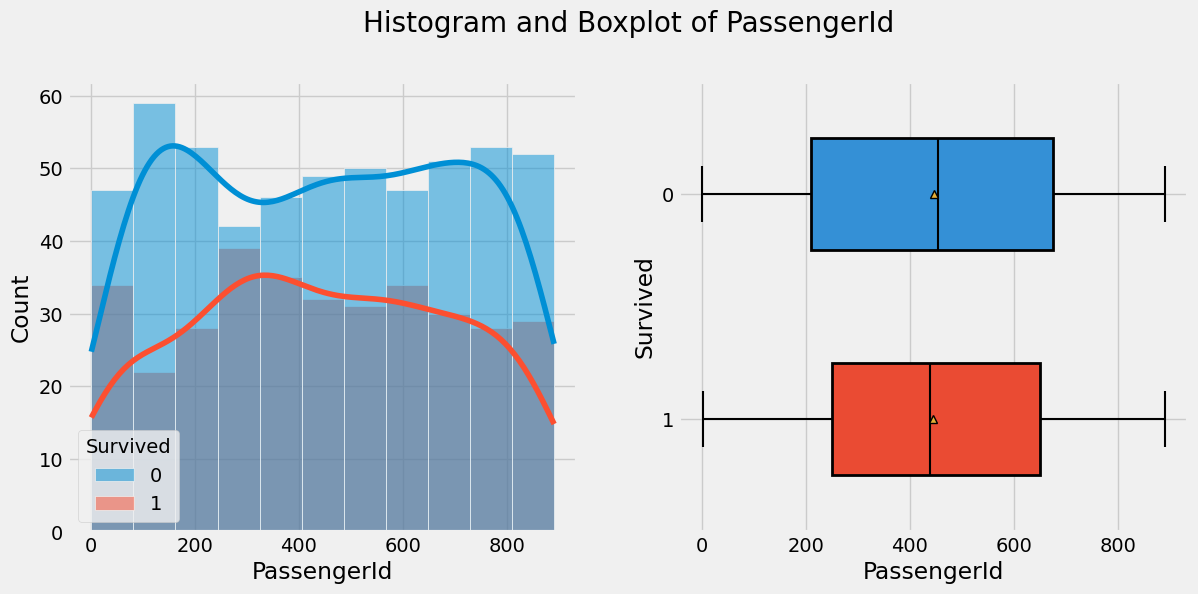

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


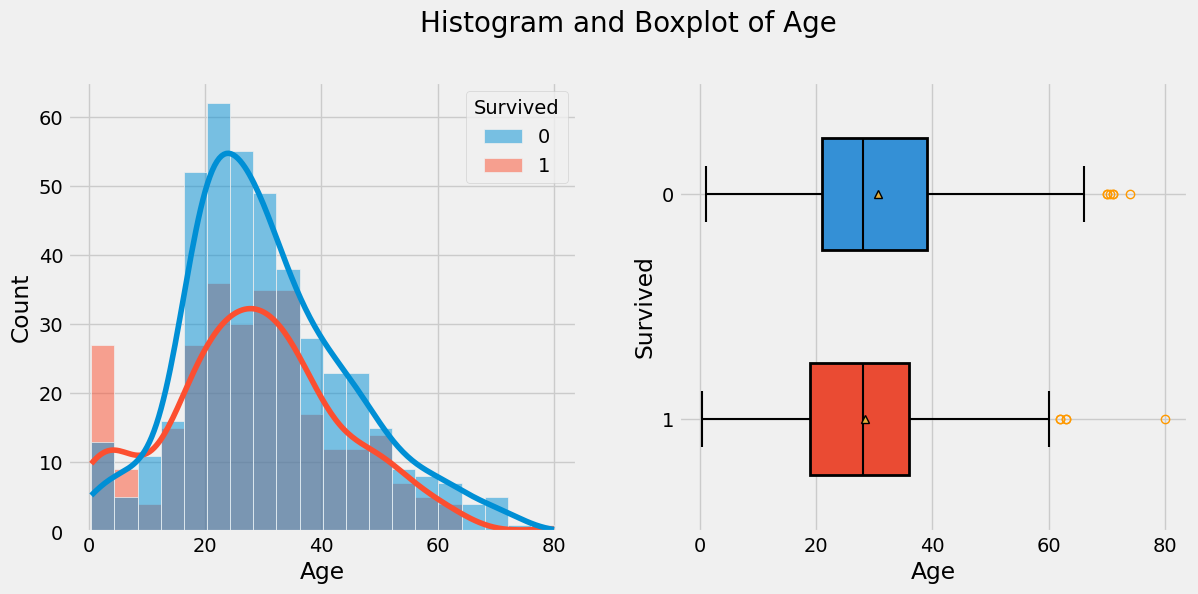

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


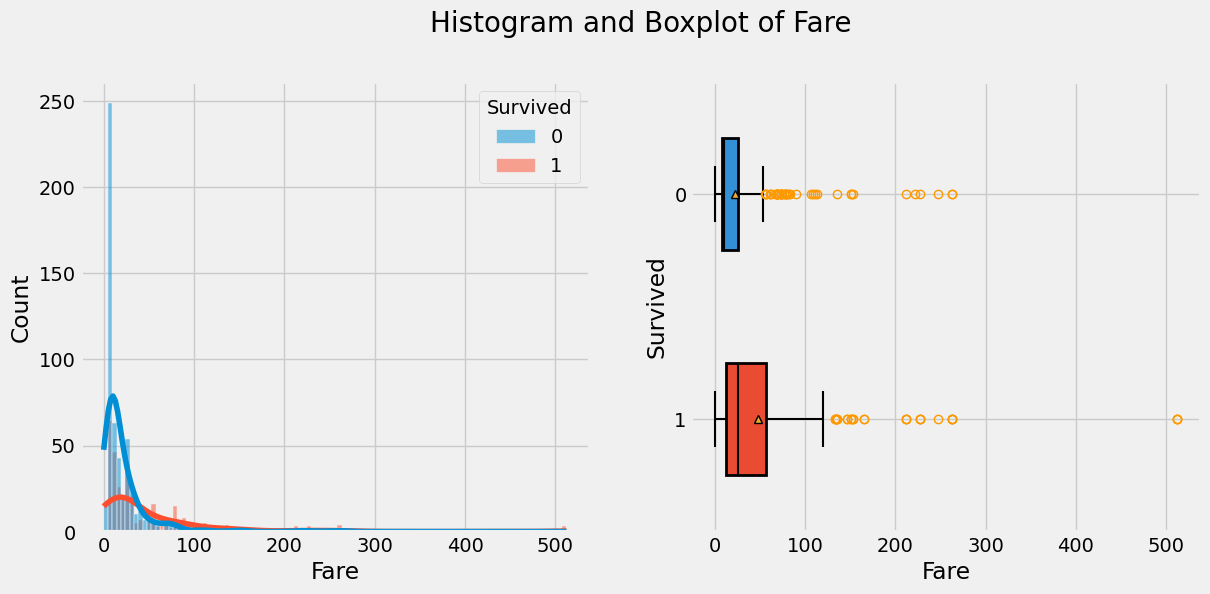

----------------------------------------------------------------------------------------------------
Countplot(s):



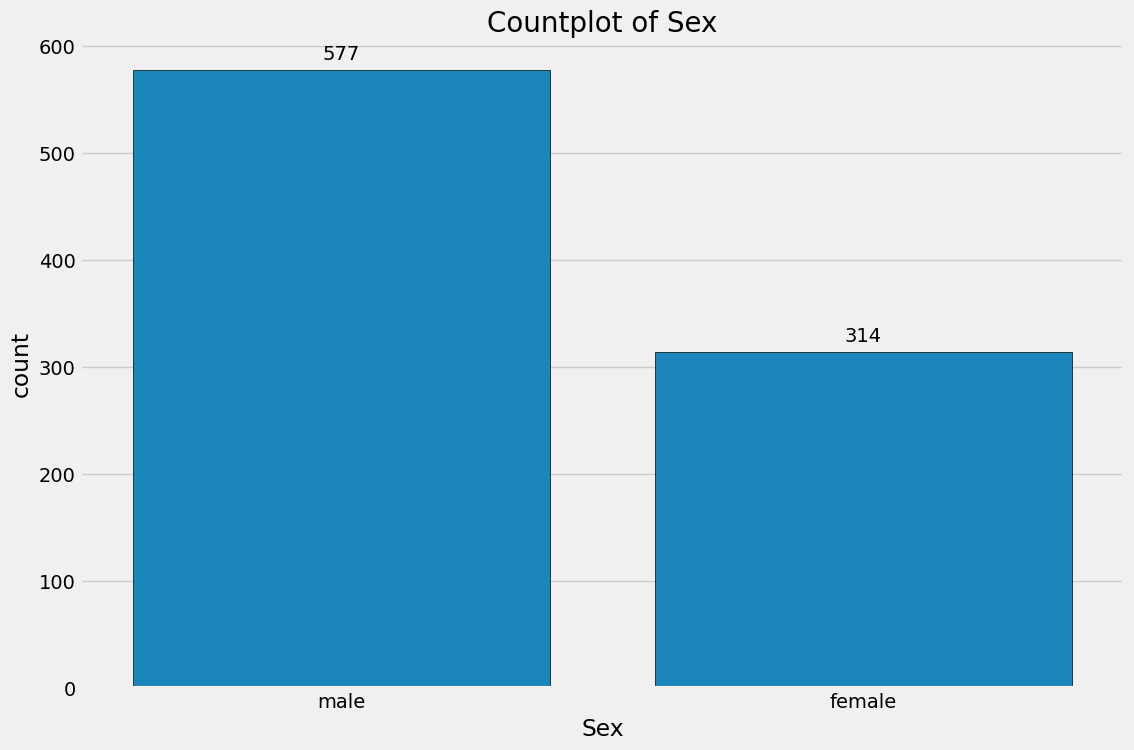

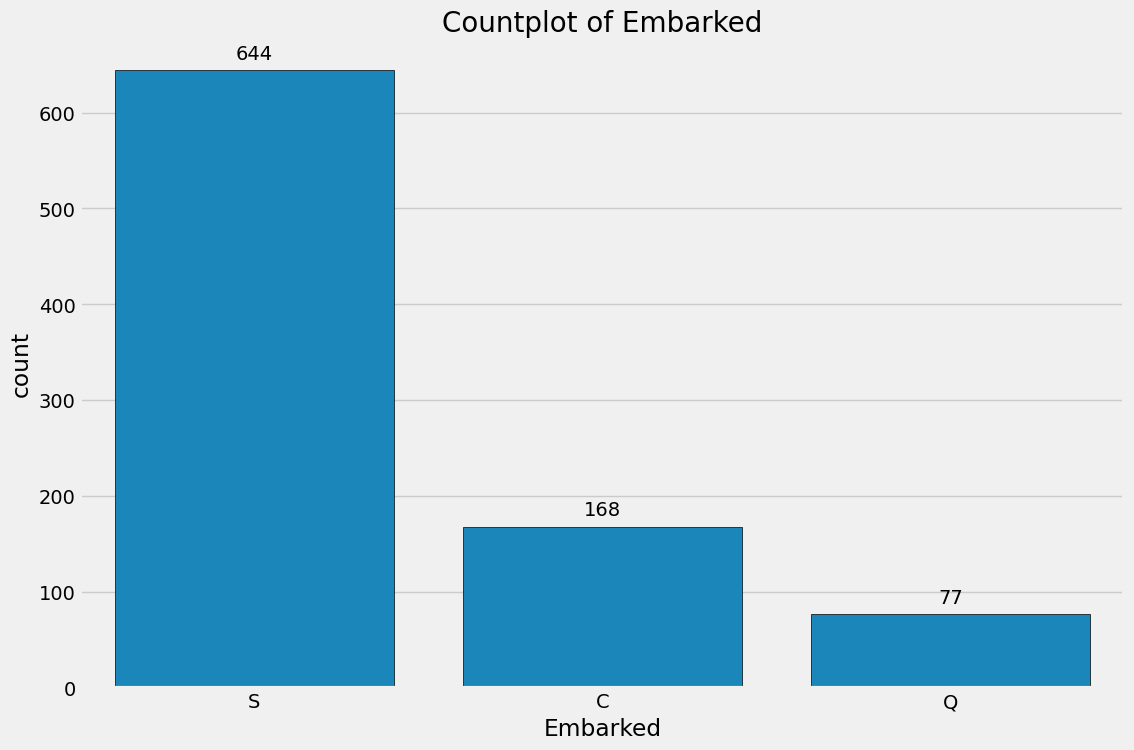

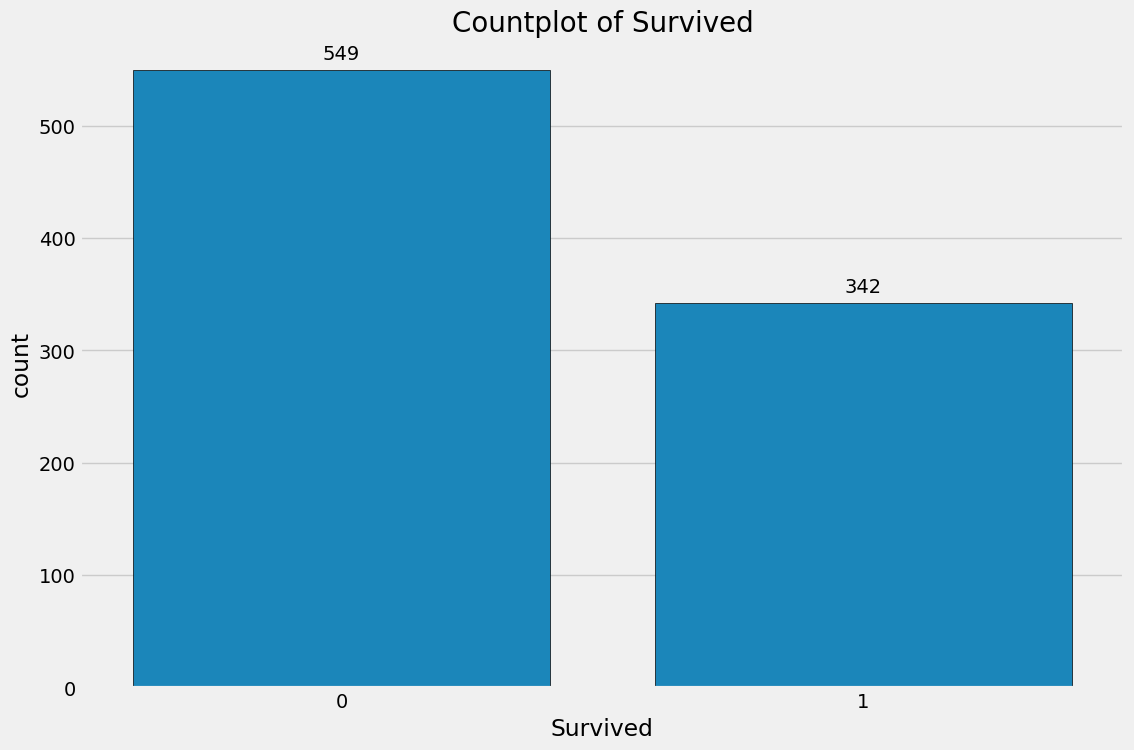

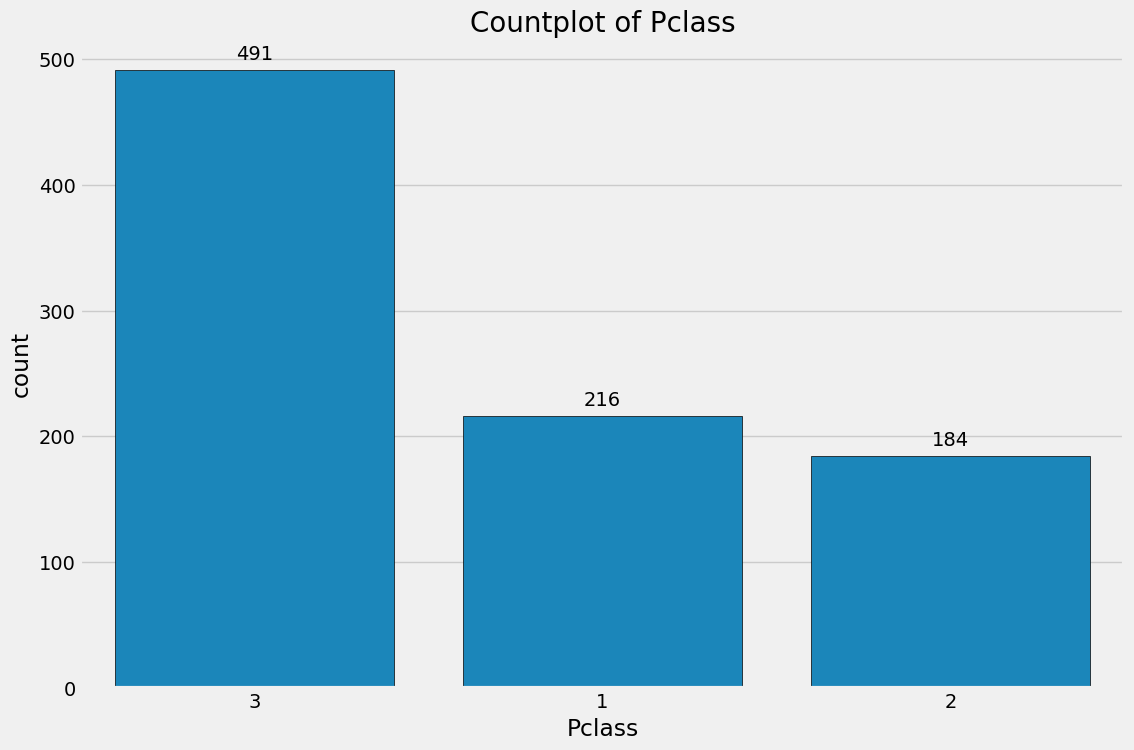

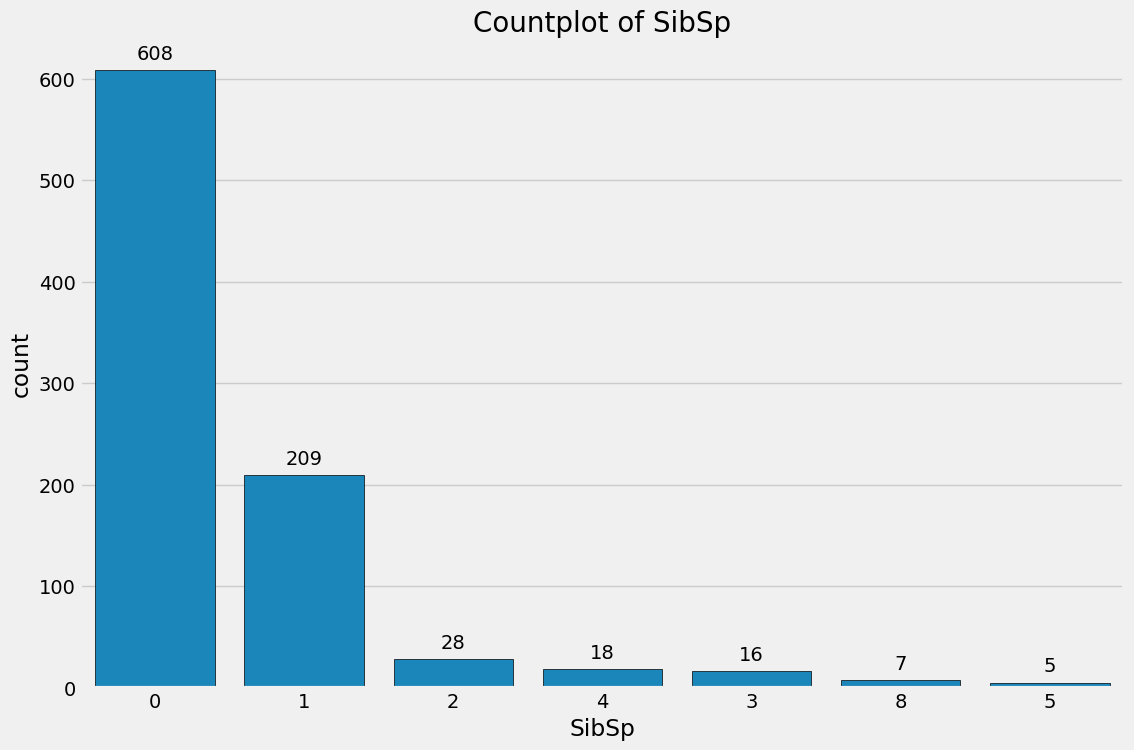

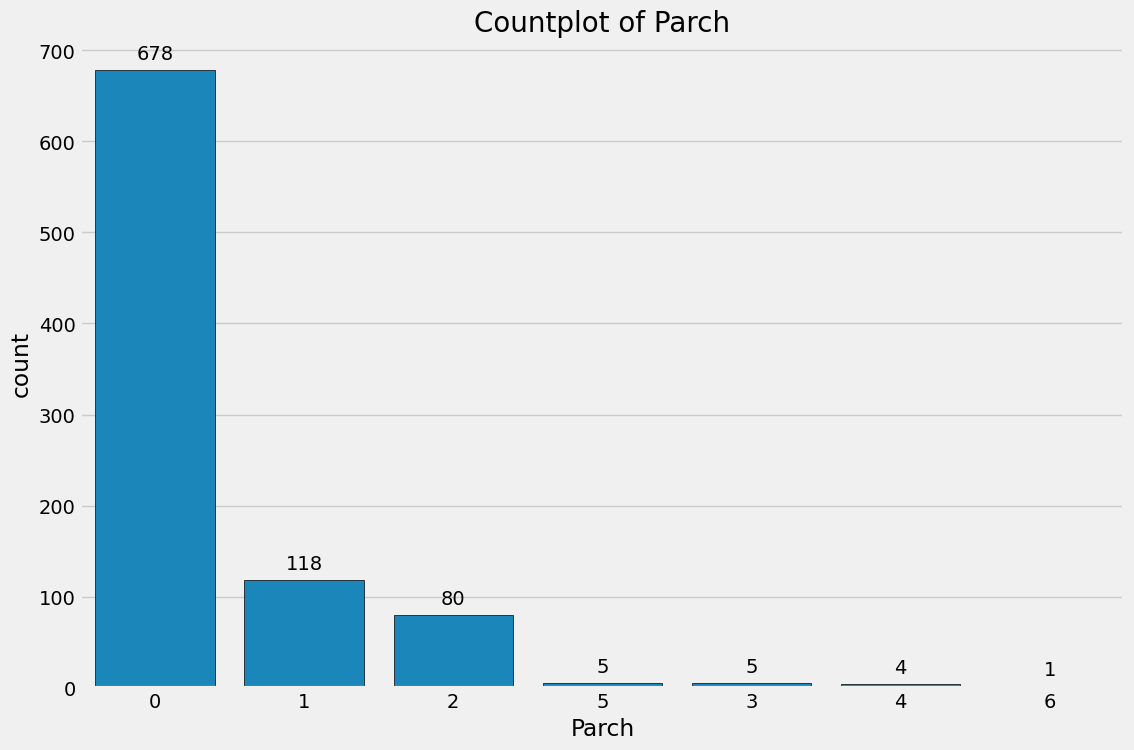

In [6]:
fast_eda(train_data, target='Survived', correlation=False)

### Missing values and balance dataset


"The `Age`, `Cabin`, and `Embarked` columns contain missing values. Due to the low number of missing values in `Embarked` (only 2), it's advisable to simply delete these rows.
Given that `Cabin` has a high proportion of missing data (over 75%), removing the entire column is a reasonable approach.
For `Age`, which has approximately 20% missing values, deleting the column would be detrimental as age is a significant factor in su so we will use an imputer with the median, but because the dataset is not balanced, in the target there are many more zeros than ones, it is advisable to balance it before replacing the unknown values with the mean, since in this way, we can discard a large number of rows in which we do not know the age, without harming the algorithm.ked` columns.


In [7]:
# Drop rows where 'Embarked' is null
train_data.drop(index=train_data[train_data['Embarked'].isnull()].index, inplace=True)

# Drop the 'Cabin' column
train_data.drop(columns='Cabin', inplace=True)

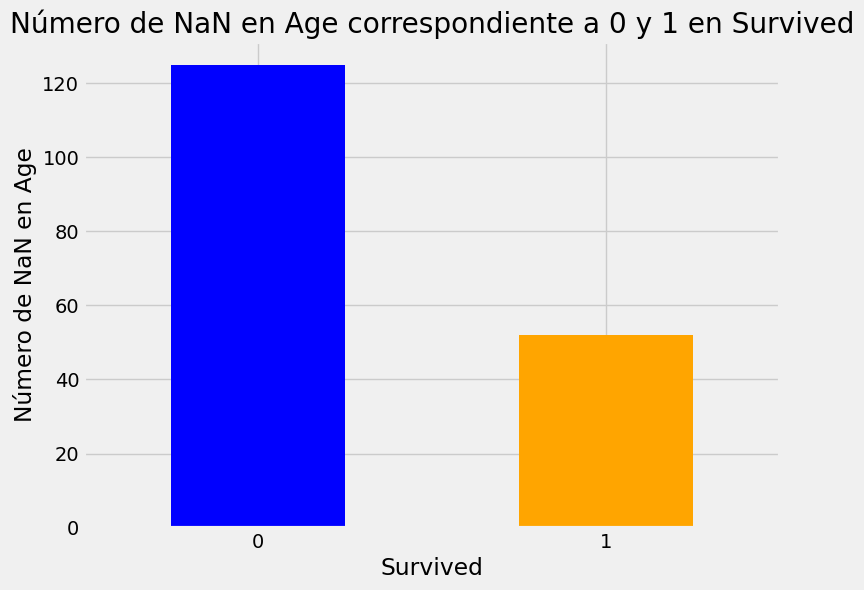

In [8]:
# Filtrar los datos donde 'Age' es NaN
nan_age_data = train_data[train_data['Age'].isna()]

# Contar los valores de 'Survived' donde 'Age' es NaN
nan_age_survived_counts = nan_age_data['Survived'].value_counts()

# Crear una gráfica de barras
plt.figure(figsize=(8, 6))
nan_age_survived_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Número de NaN en Age correspondiente a 0 y 1 en Survived')
plt.xlabel('Survived')
plt.ylabel('Número de NaN en Age')
plt.xticks(rotation=0)
plt.show()

It is observed that there are less nan corresponding to 0 than the rows corresponding to 0 to be discarded for balancing the algorithm, so we can remove them all.

In [9]:
# Delete rows where 'Age' is NaN and 'Survived' is 0
train_data.drop(index=train_data[(train_data['Age'].isna()) & (train_data['Survived'] == 0)].index, inplace=True)

Balancing the dataset

In [10]:
# Separate the classes
class_0 = train_data[train_data['Survived'] == 0]
class_1 = train_data[train_data['Survived'] == 1]

# Determine the minimum size between the two classes
min_size = min(len(class_0), len(class_1))

# Undersample both classes to have the same size
class_0_balanced = class_0.sample(n=min_size, random_state=42)
class_1_balanced = class_1.sample(n=min_size, random_state=42)

# Combine the undersampled classes into a new DataFrame
train_data = pd.concat([class_0_balanced, class_1_balanced])

# Shuffle the resulting DataFrame
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the balancing
print(train_data['Survived'].value_counts())

Survived
1    340
0    340
Name: count, dtype: int64


Use median imputer to dealing with NaN in 'Age'

In [11]:
# Select only the 'Age' column for imputation
age_data = train_data[['Age']]
# Create the SimpleImputer with the median strategy
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
# Fit the imputer on the 'Age' column
imp_median.fit(age_data)
# Transform the 'Age' column
train_data['Age'] = imp_median.transform(age_data)

### Data Wrangling

Now we can see the graphics again

DataFrame Head:


PassengerId  Survived  Pclass  \
0          143         1       3   
1          107         1       3   
2          811         0       3   

                                                Name     Sex   Age  SibSp  \
0  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...  female  24.0      1   
1                   Salkjelsvik, Miss. Anna Kristine  female  21.0      0   
2                             Alexander, Mr. William    male  26.0      0   

   Parch            Ticket     Fare Embarked  
0      0  STON/O2. 3101279  15.8500        S  
1      0            343120   7.6500        S  
2      0              3474   7.8875        S

DataFrame Tail:


PassengerId  Survived  Pclass                             Name     Sex  \
677          750         0       3          Connaghton, Mr. Michael    male   
678          541         1       1          Crosby, Miss. Harriet R  female   
679          823         0       1  Reuchlin, Jonkheer. John George    male   

      Age  SibSp  Parch     Ticket   Fare Embarked  
677  31.0      0      0     335097   7.75        Q  
678  36.0      0      2  WE/P 5735  71.00        S  
679  38.0      0      0      19972   0.00        S

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(680, 11)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  680 non-null    int64  
 1   Survived     680 non-null    int64  
 2   Pclass       680 non-null    int64  
 3   Name         680 non-null    object 
 4   Sex          680 non-null    object 
 5   Age          680 non-null    float64
 6   SibSp        680 non-null    int64  
 7   Parch        680 non-null    int64  
 8   Ticket       680 non-null    object 
 9   Fare         680 non-null    float64
 10  Embarked     680 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 58.6+ KB
-----------------------------------

/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'PassengerId    680
Survived       680
Pclass         680
Age            680
SibSp          680
Parch          680
Fare           680
Name: count, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'PassengerId    441.669
Survived           0.5
Pclass           2.222

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

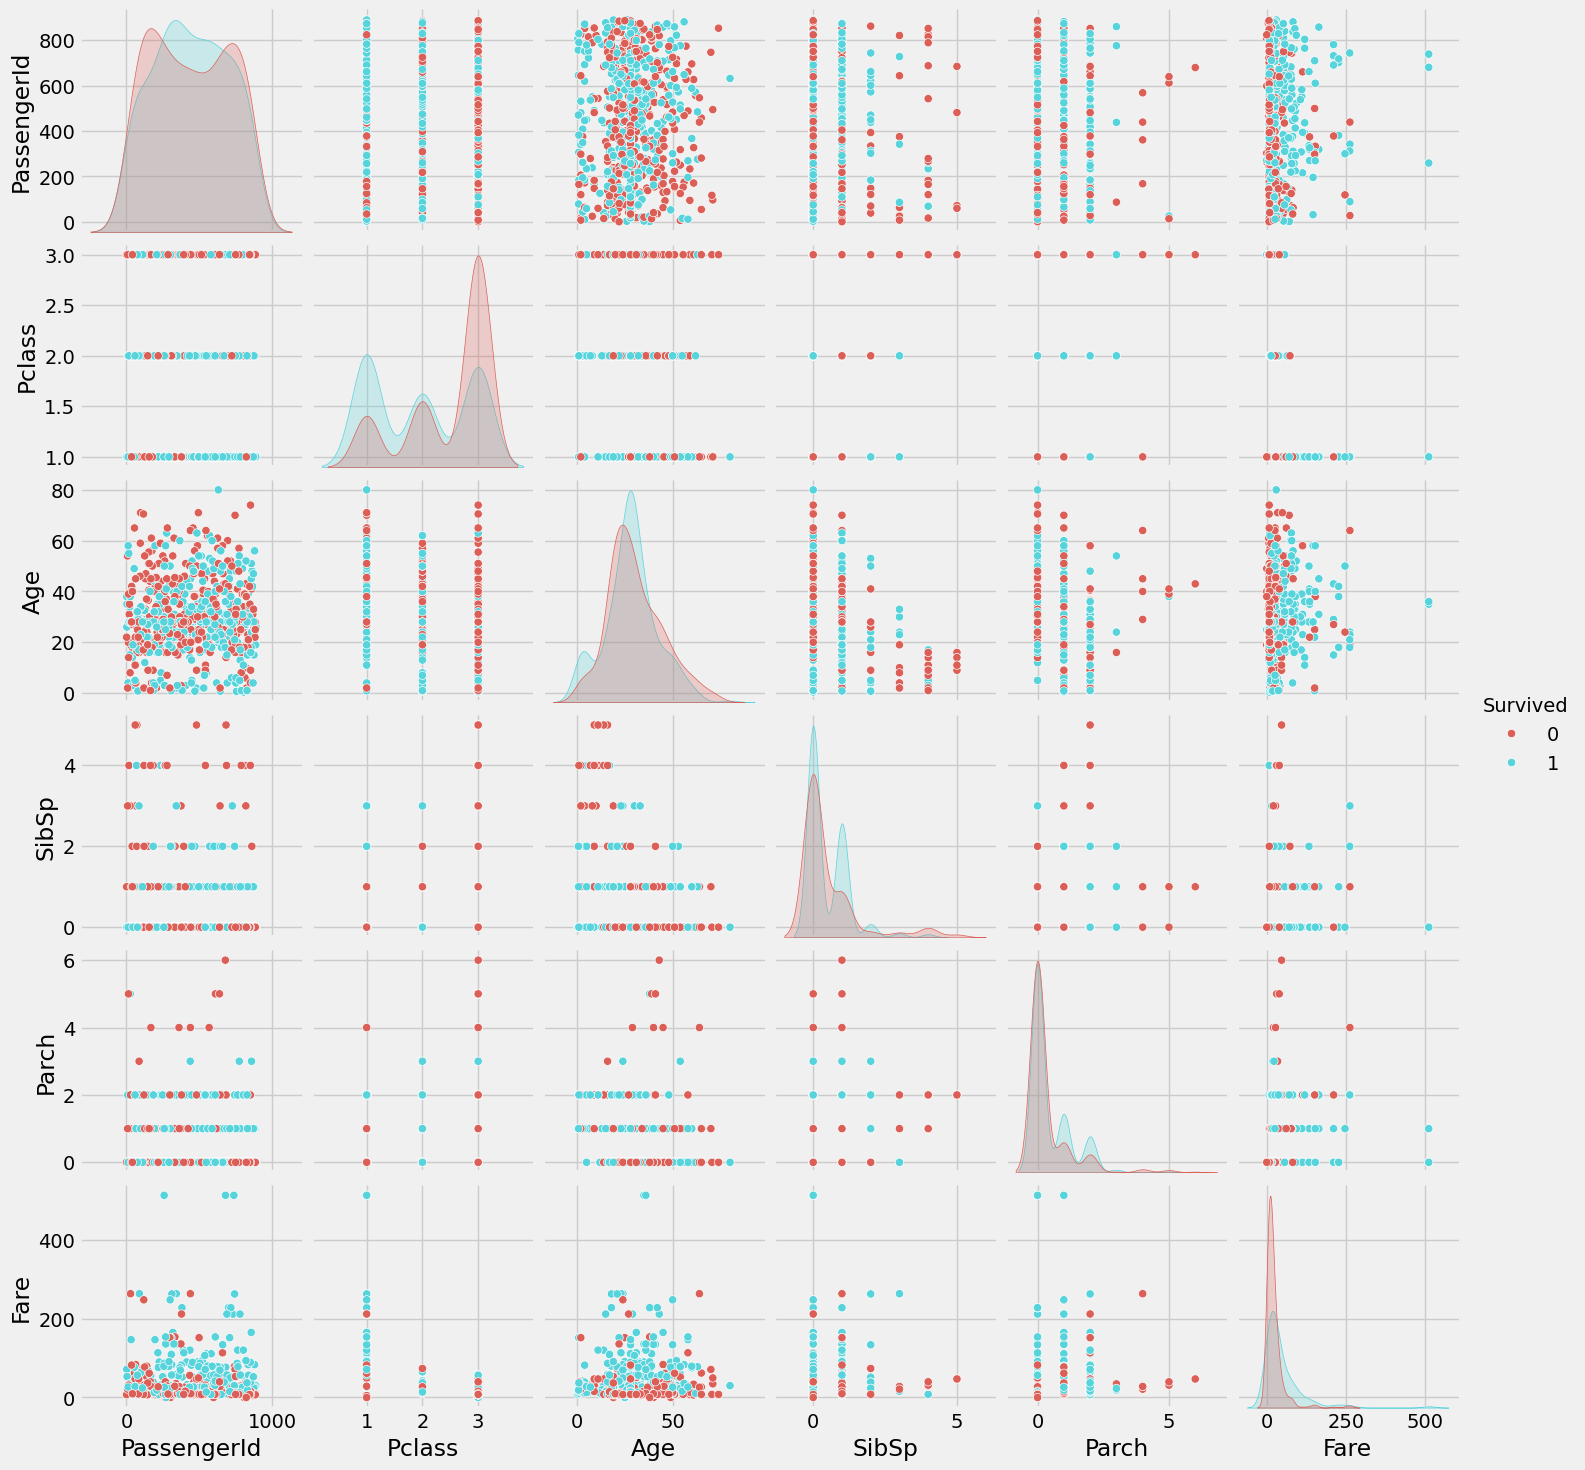

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


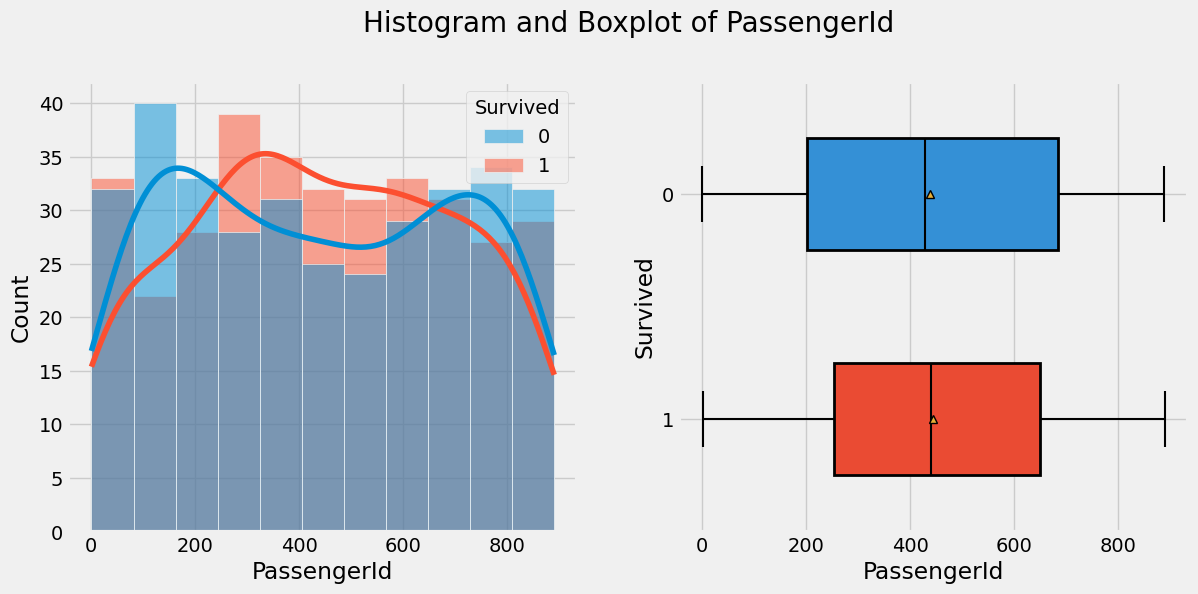

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


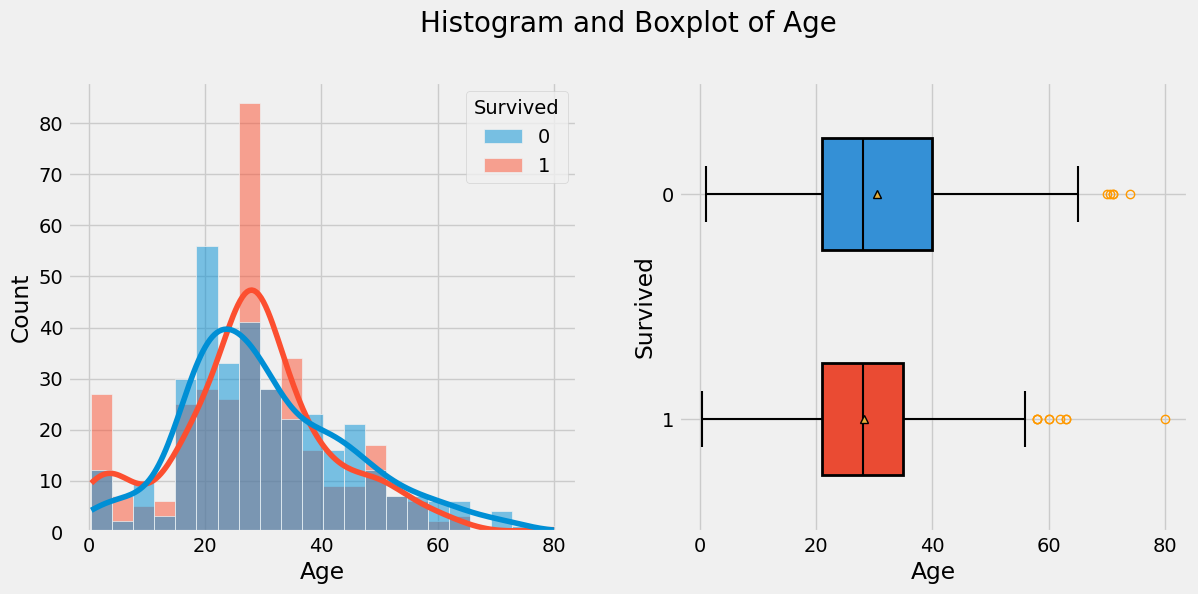

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


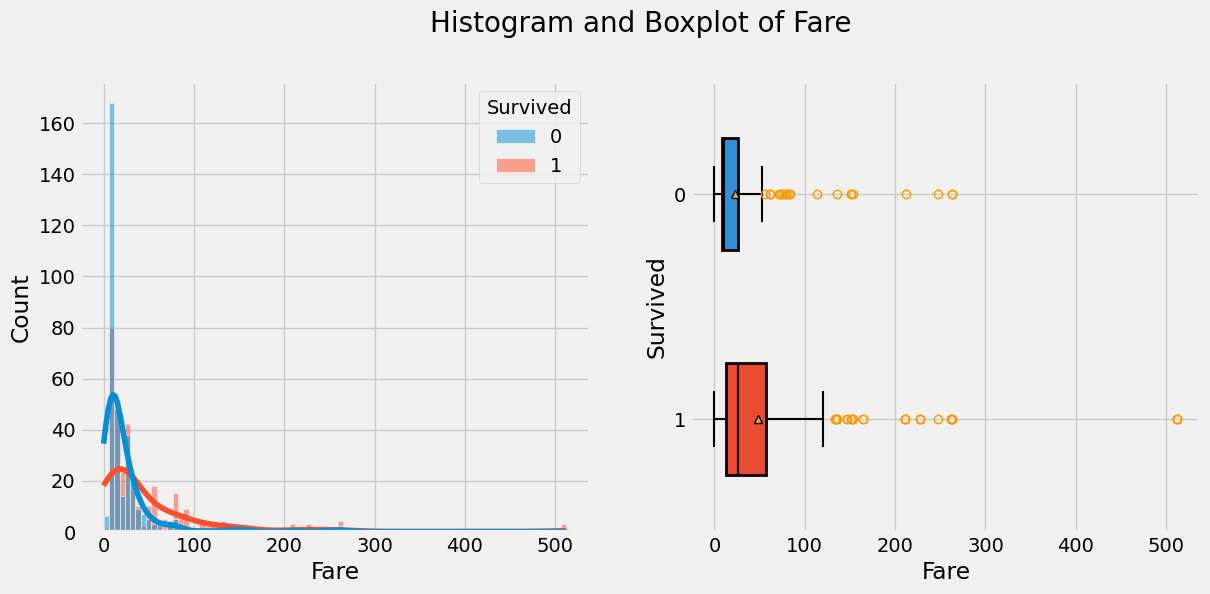

----------------------------------------------------------------------------------------------------
Countplot(s):



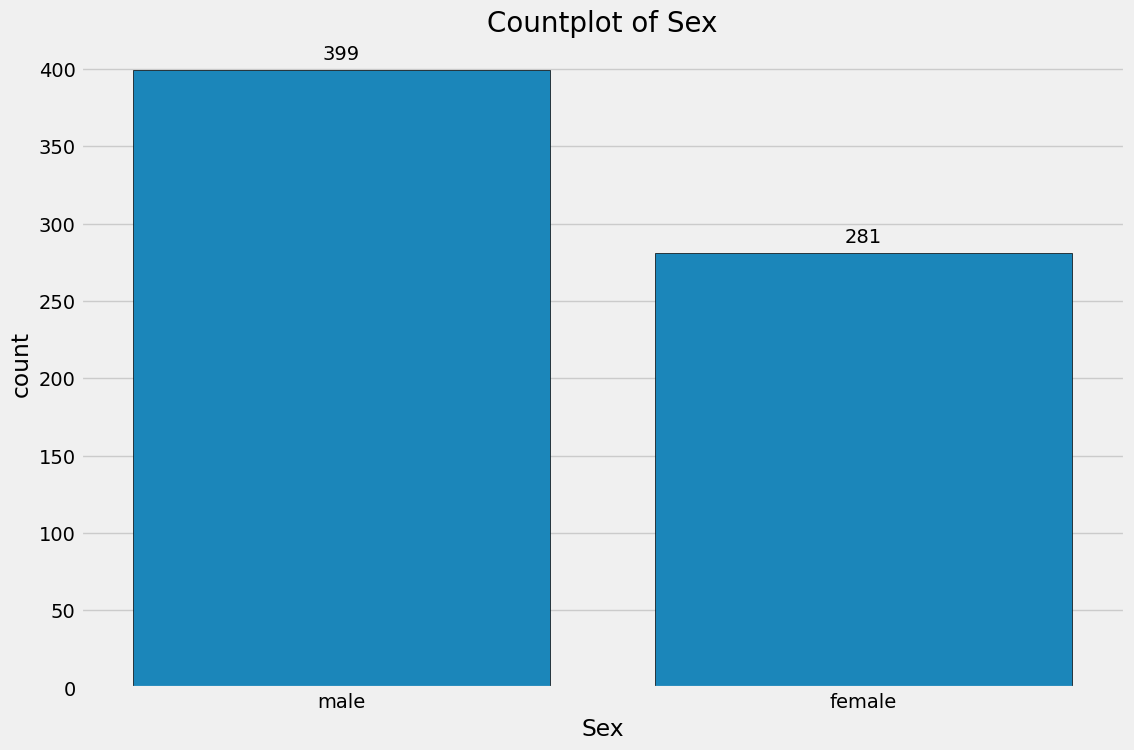

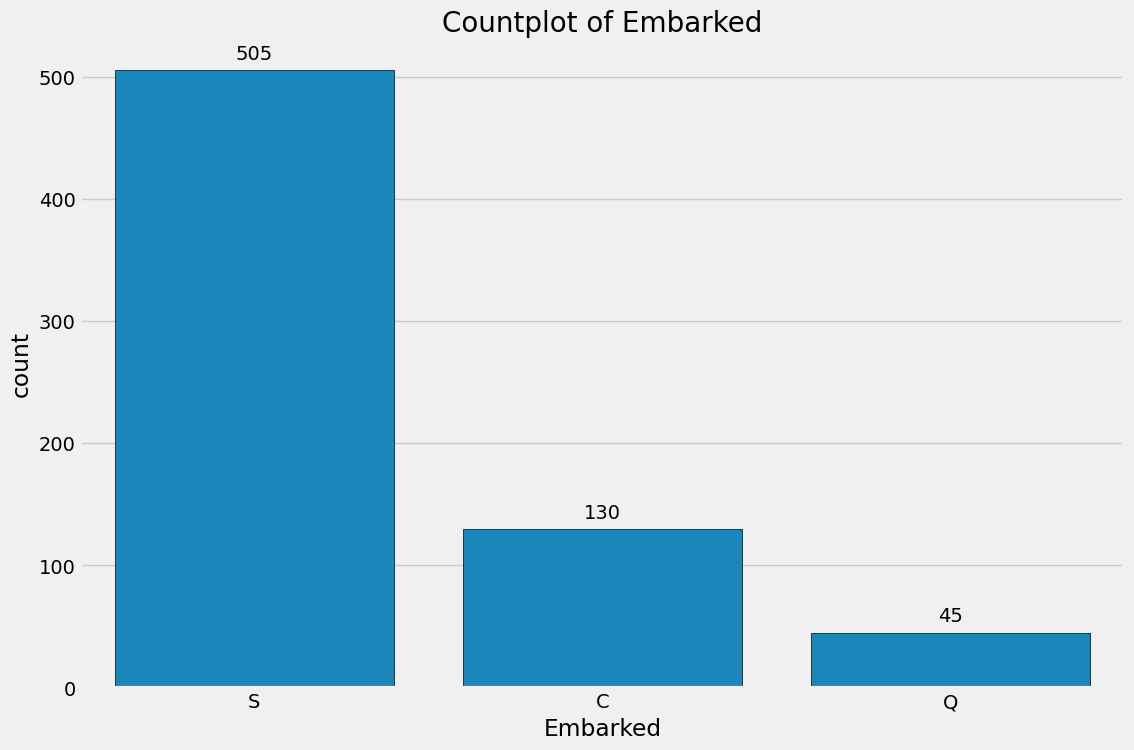

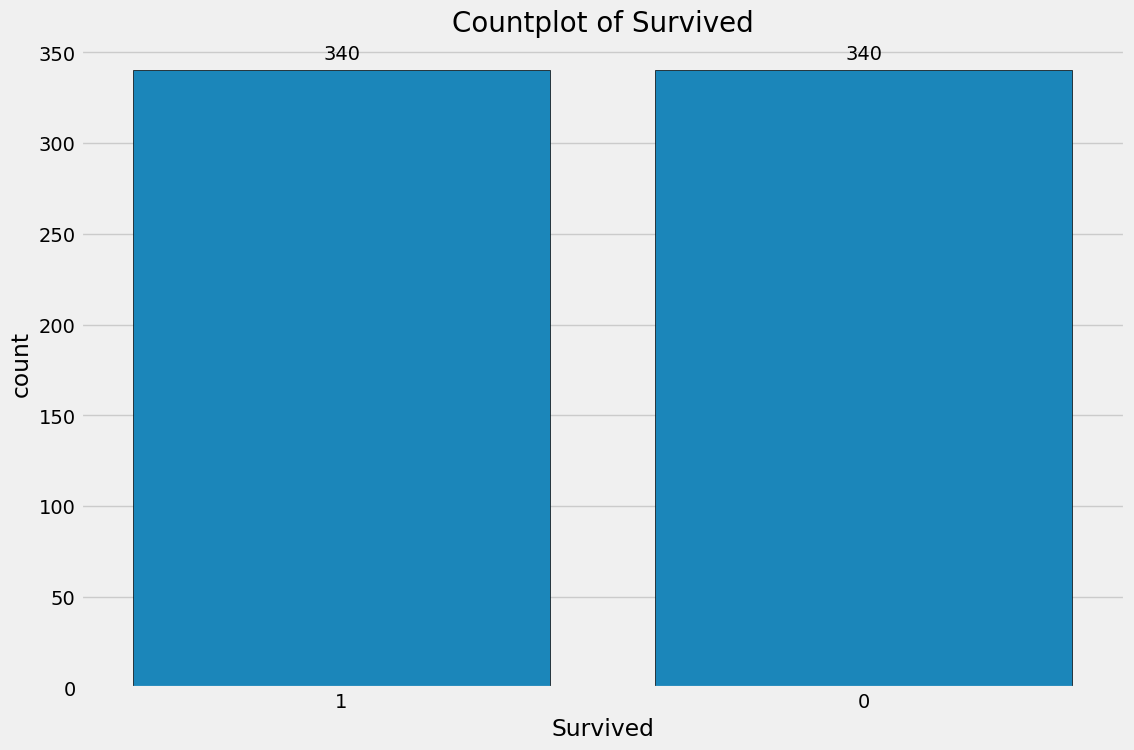

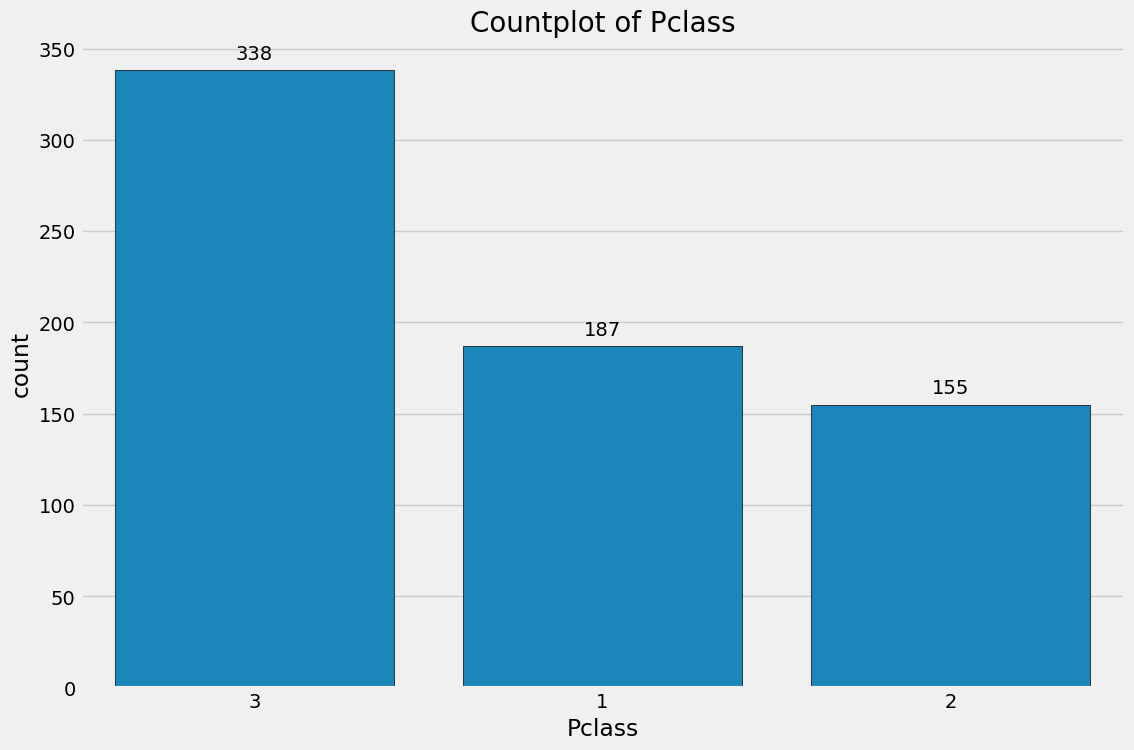

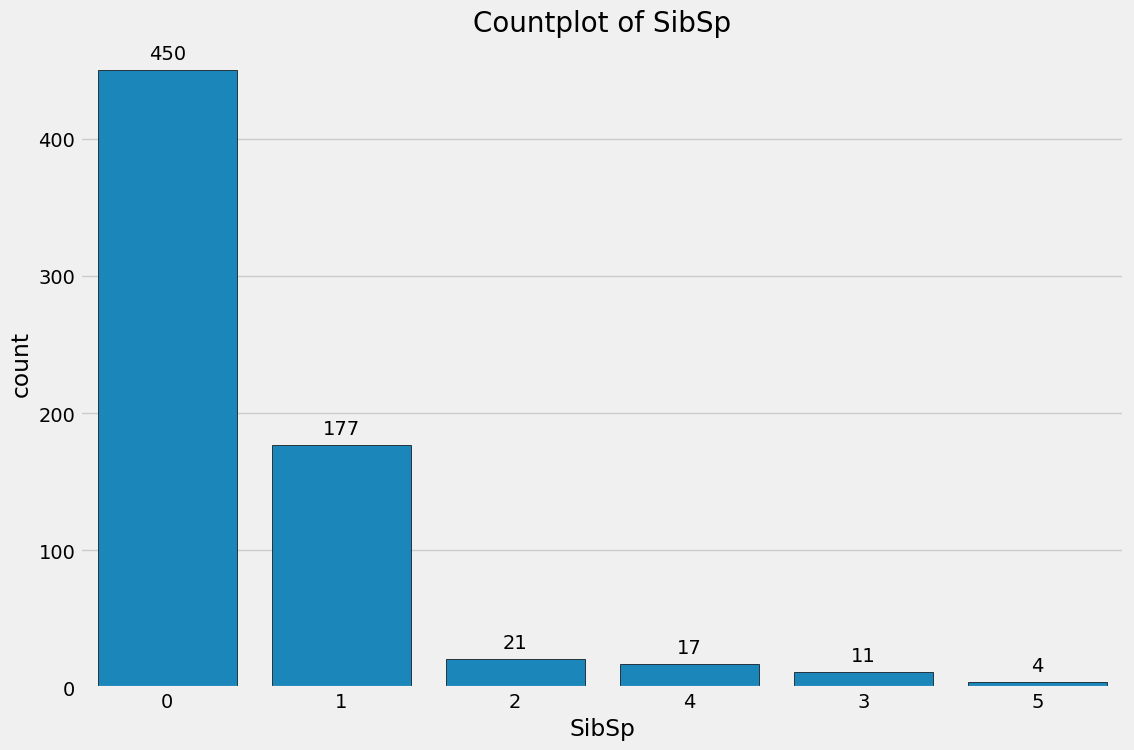

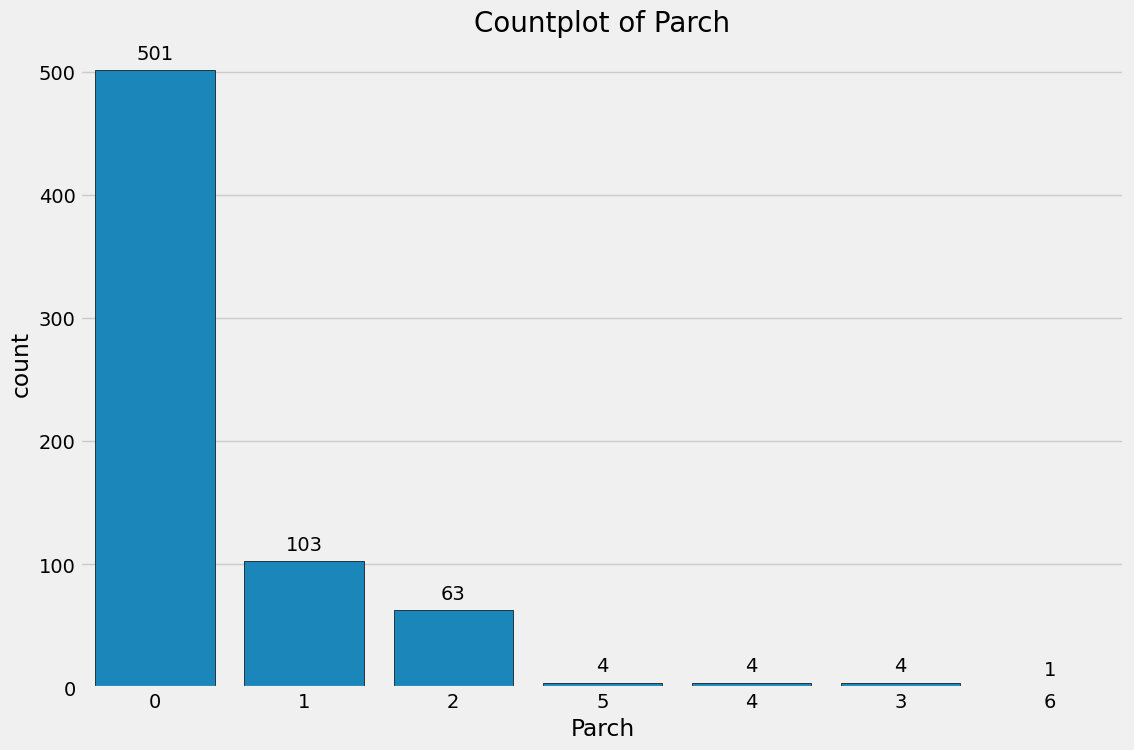

In [12]:
fast_eda(train_data, target='Survived', correlation=False)

#### PassengerId
This column is only the enumeration of the passengers, it does not represent anything that can help to predict if he survives or not, so we will remove it.

In [13]:
# Drop the 'PassengerId' column
train_data.drop(columns='PassengerId', inplace=True)

#### Survived
It is the target and we have already balanced it above

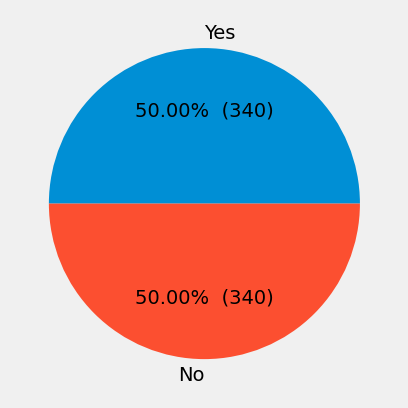

In [14]:
# Define the autopct format function
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.2f}%  ({val:d})'
    return my_format

# Get the value counts of the 'Survived' column
vc = train_data['Survived'].value_counts()

# Rename the index values for the pie chart labels
vc.index = vc.index.map({0: 'No', 1: 'Yes'})

# Draw a pie chart using value counts and the `autopct_format` format
_ = plt.pie(vc, labels=vc.index, autopct=autopct_format(vc))
plt.show()

#### Pclass
Since the data in Pclass are categorical variables, one-hot encoder will be used in the column.

In [15]:
# Initialize the one-hot encoder
enc1 = OneHotEncoder(handle_unknown='ignore', drop=None)

# One-hot encode 'Pclass'; the output is a numpy array
encoded_Pclass = enc1.fit_transform(train_data[['Pclass']]).toarray()

# Convert numpy array to pandas DataFrame with columns names based on original category labels
encoded_Pclass = pd.DataFrame(encoded_Pclass, columns=['Pclass' + str(int(x)) for x in enc1.categories_[0]])

# Horizontally concatenate the original 'train_data' data set with the two one-hot columns
train_data = pd.concat([train_data, encoded_Pclass], axis=1)

# Delete the original Pclass column
train_data.drop(columns='Pclass', inplace=True)

#### Name
This column is only the name of the passengers, it does not represent anything that can help to predict if he survives or not, so we will remove it.

In [16]:
# Drop the 'Name' column
train_data.drop(columns='Name', inplace=True)

#### Sex
Since the data in Sex are categorical variables, one-hot encoder will be used in the column. We can only use 1 column because if one is 0, the other is 1.

In [17]:
# Initialize the OneHotEncoder
enc1 = OneHotEncoder()

# Fit and transform the 'Sex' column
encoded_Sex = enc1.fit_transform(train_data[['Sex']]).toarray()

# Convert numpy array to pandas DataFrame with column names based on original category labels
encoded_Sex = pd.DataFrame(encoded_Sex, columns=['Sex_' + str(x) for x in enc1.categories_[0]])

# Horizontally concatenate the original 'train_data' data set with the two one-hot columns
train_data = pd.concat([train_data, encoded_Sex], axis=1)

# Delete the original Sex column and Sex_female column
train_data.drop(columns=['Sex', 'Sex_female'], inplace=True)

#### SibSp and Parch
SibSp and Parch are ok but we can join them into a new column called Family to express the family size in the Titanic.

In [18]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch']

#### Ticket
This column is only the number f the ticket of the passengers, it does not represent anything that can help to predict if he survives or not, so we will remove it.

In [19]:
# Drop the 'Ticket' column
train_data.drop(columns='Ticket', inplace=True)

#### Fare
Fare is ok, is a continues variable correctly formatted.

#### Embarked
Since the data in Pclass are categorical variables, one-hot encoder will be used in the column.

In [20]:
# Initialize the OneHotEncoder
enc1 = OneHotEncoder()

# Fit and transform the 'Embarked' column
encoded_Embarked  = enc1.fit_transform(train_data[['Embarked']]).toarray()

# Convert numpy array to pandas DataFrame with column names based on original category labels
encoded_Embarked = pd.DataFrame(encoded_Embarked, columns=['Embarked_' + str(x) for x in enc1.categories_[0]])

# Horizontally concatenate the original 'train_data' data set with the two one-hot columns
train_data = pd.concat([train_data, encoded_Embarked], axis=1)

# Delete the original Embarked column and Sex_female column
train_data.drop(columns=['Embarked'], inplace=True)

#### Fasteda again

DataFrame Head:


Survived   Age  SibSp  Parch     Fare  Pclass1  Pclass2  Pclass3  Sex_male  \
0         1  24.0      1      0  15.8500      0.0      0.0      1.0       0.0   
1         1  21.0      0      0   7.6500      0.0      0.0      1.0       0.0   
2         0  26.0      0      0   7.8875      0.0      0.0      1.0       1.0   

   Family  Embarked_C  Embarked_Q  Embarked_S  
0       1         0.0         0.0         1.0  
1       0         0.0         0.0         1.0  
2       0         0.0         0.0         1.0

DataFrame Tail:


Survived   Age  SibSp  Parch   Fare  Pclass1  Pclass2  Pclass3  Sex_male  \
677         0  31.0      0      0   7.75      0.0      0.0      1.0       1.0   
678         1  36.0      0      2  71.00      1.0      0.0      0.0       0.0   
679         0  38.0      0      0   0.00      1.0      0.0      0.0       1.0   

     Family  Embarked_C  Embarked_Q  Embarked_S  
677       0         0.0         1.0         0.0  
678       2         0.0         0.0         1.0  
679       0         0.0         0.0         1.0

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(680, 13)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    680 non-null    int64  
 1   Age         680 non-null    float64
 2   SibSp       680 non-null    int64  
 3   Parch       680 non-null    int64  
 4   Fare        680 non-null    float64
 5   Pclass1     680 non-null    float64
 6   Pclass2     680 non-null    float64
 7   Pclass3     680 non-null    float64
 8   Sex_male    680 non-null    float64
 9   Family      680 non-null    int64  
 10  Embarked_C  680 non-null    float64
 11  Embarked_Q  680 non-null    float64
 12  Embarked_S  680 non-null    float64
dtypes: float64(9), int64(4)


/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Survived      680
Age           680
SibSp         680
Parch         680
Fare          680
Pclass1       680
Pclass2       680
Pclass3       680
Sex_male      680
Family        680
Embarked_C    680
Embarked_Q    680
Embarked_S    680
Name: count, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in 

----------------------------------------------------------------------------------------------------
DataFrame Correlation:



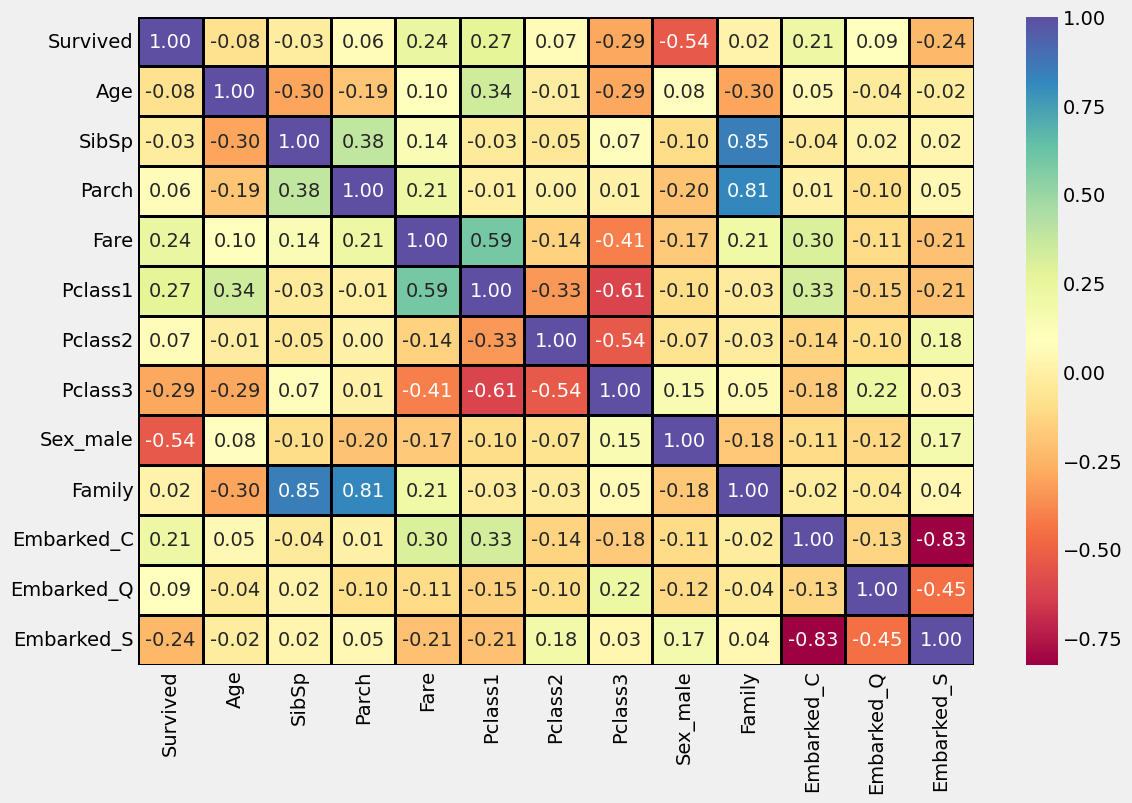

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

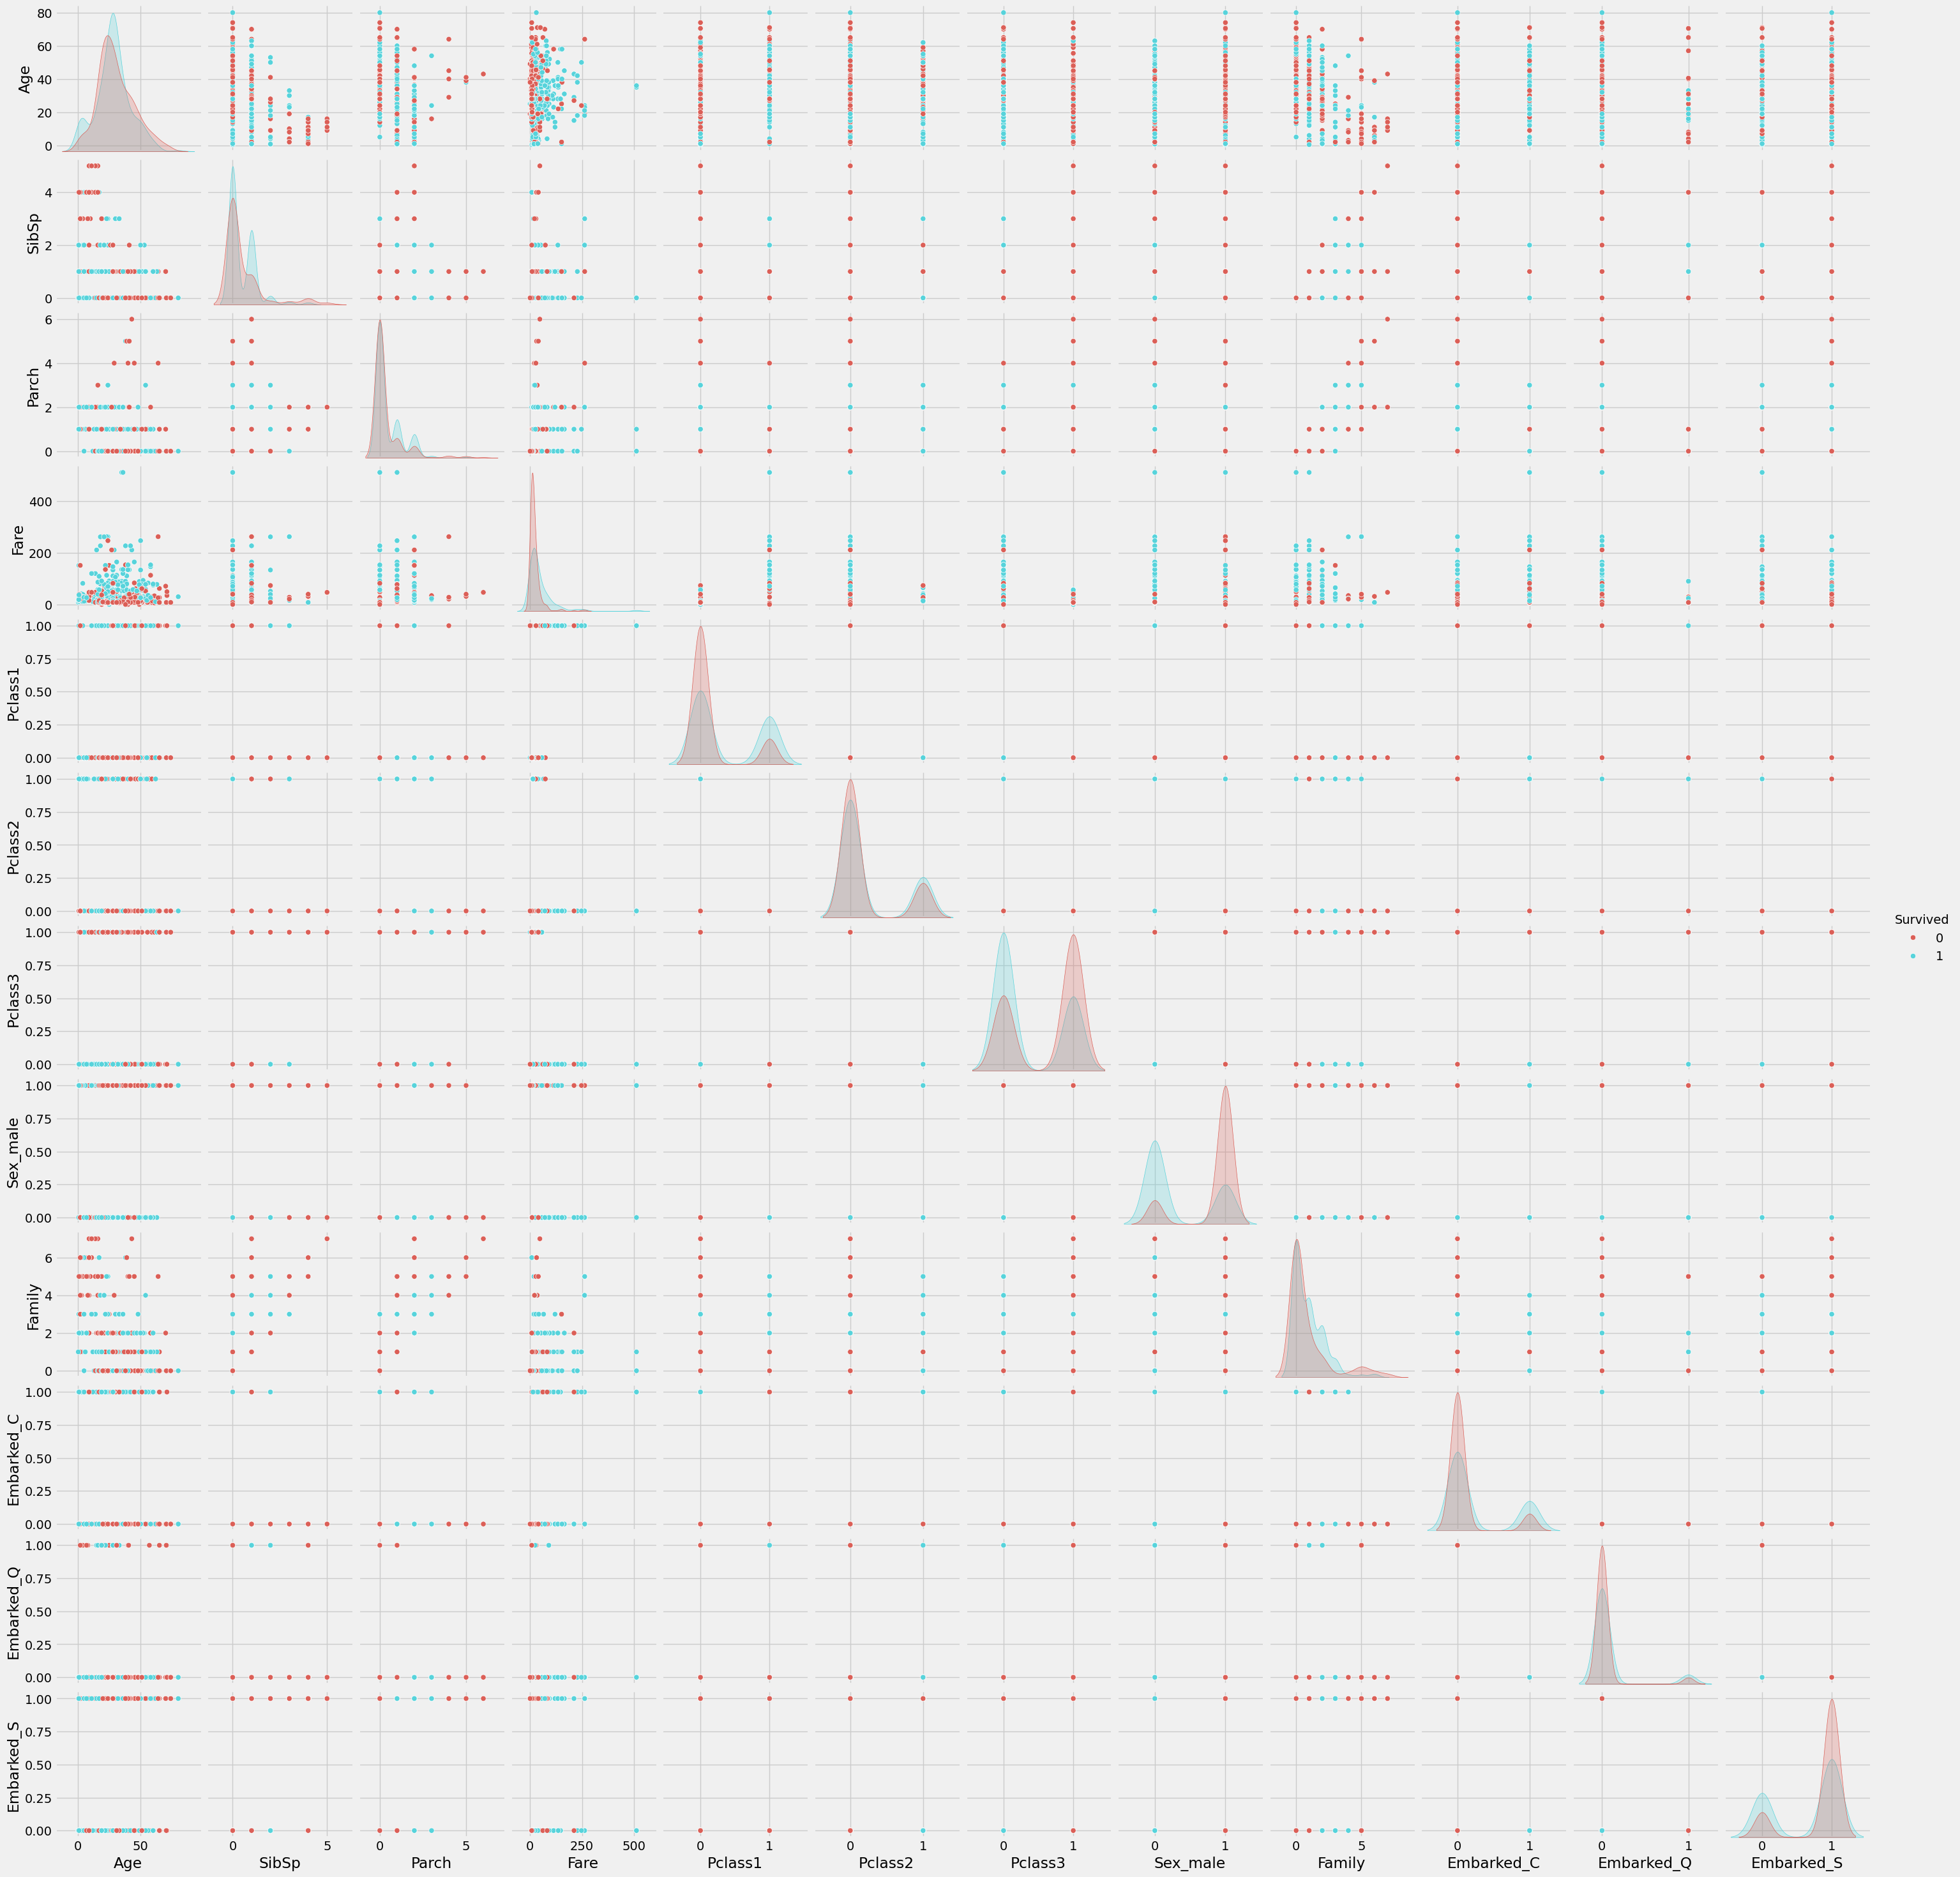

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


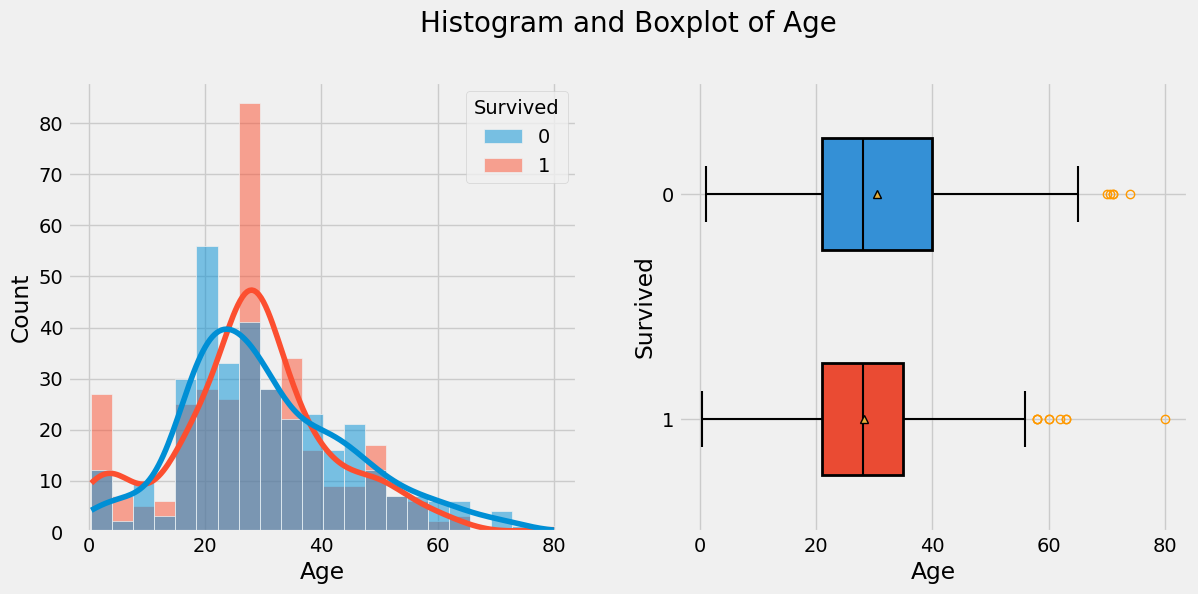

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


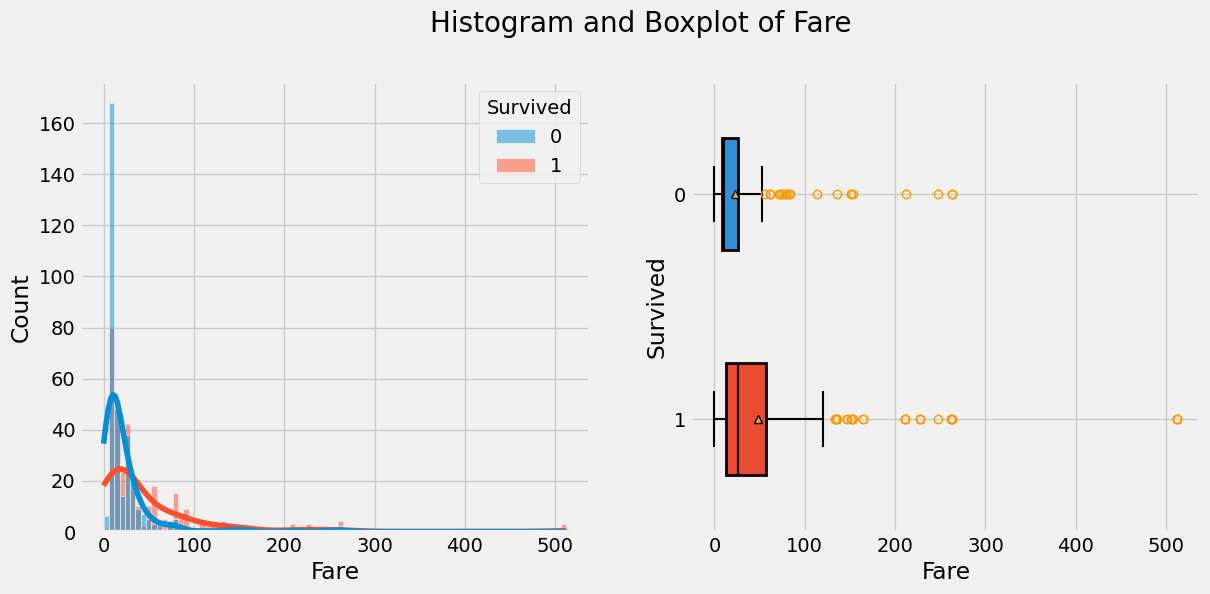

----------------------------------------------------------------------------------------------------
Countplot(s):



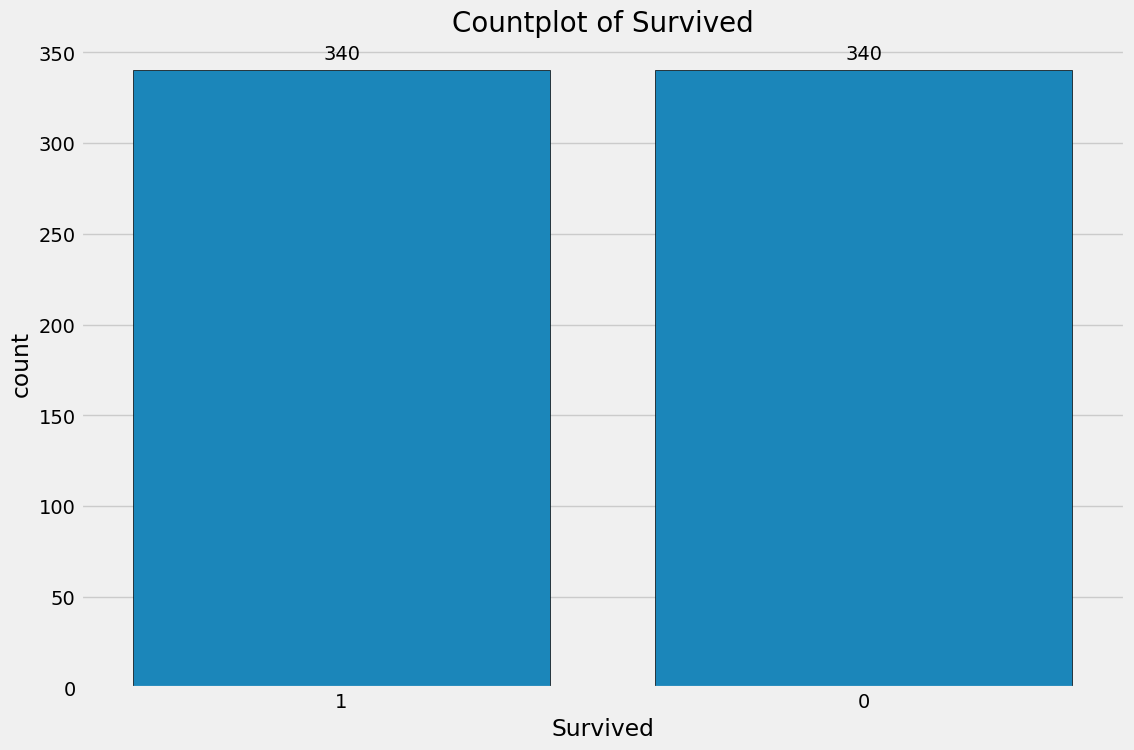

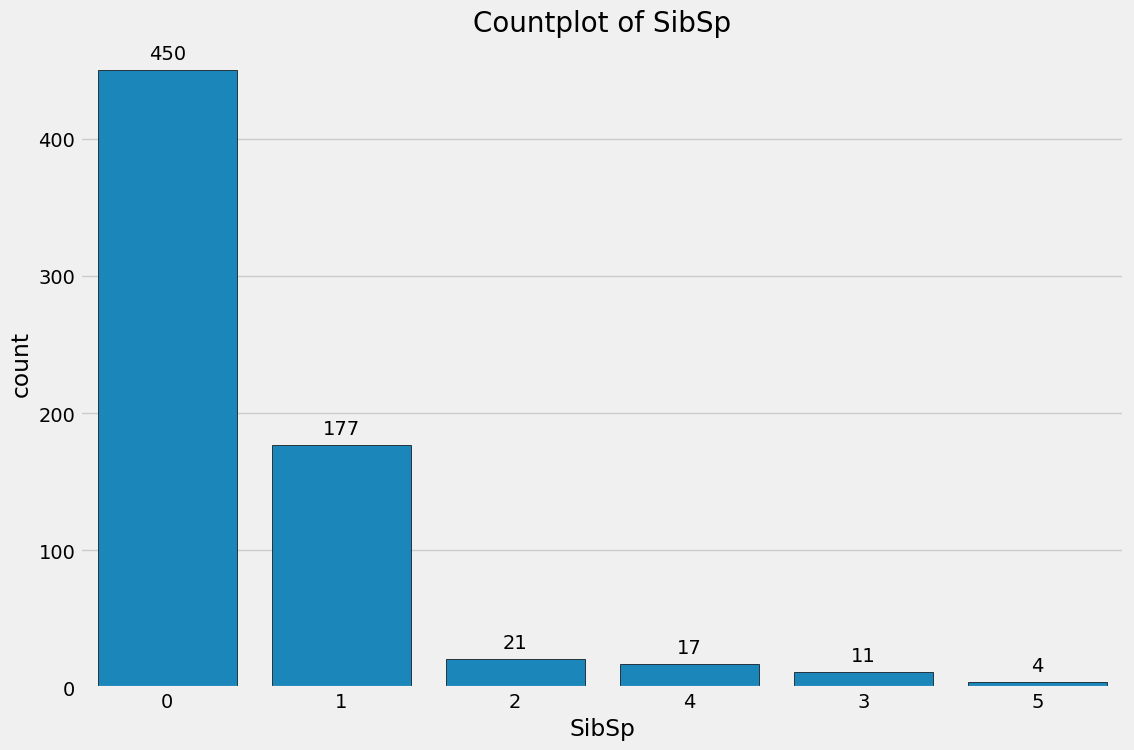

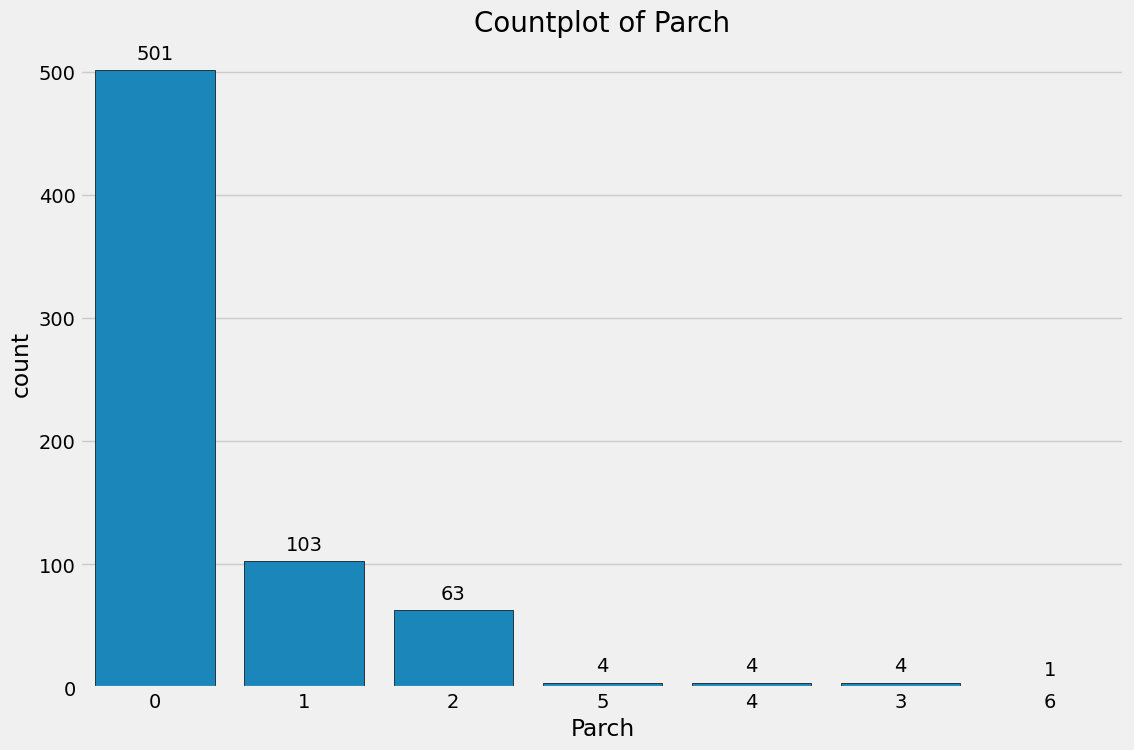

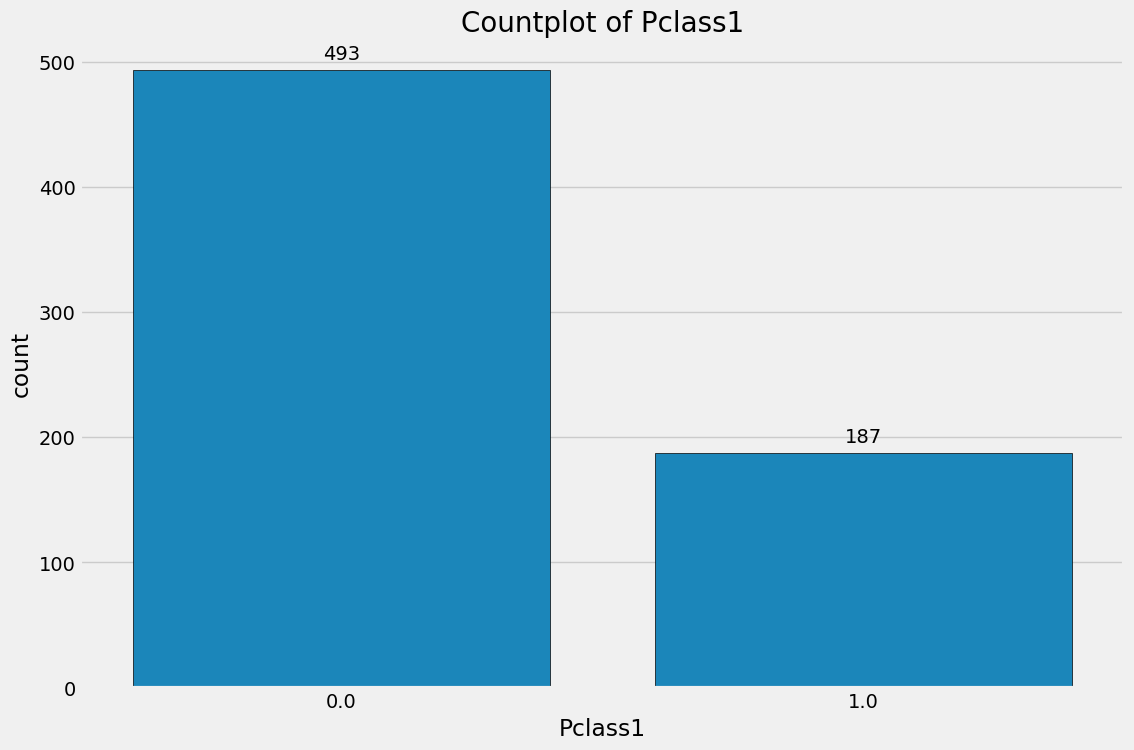

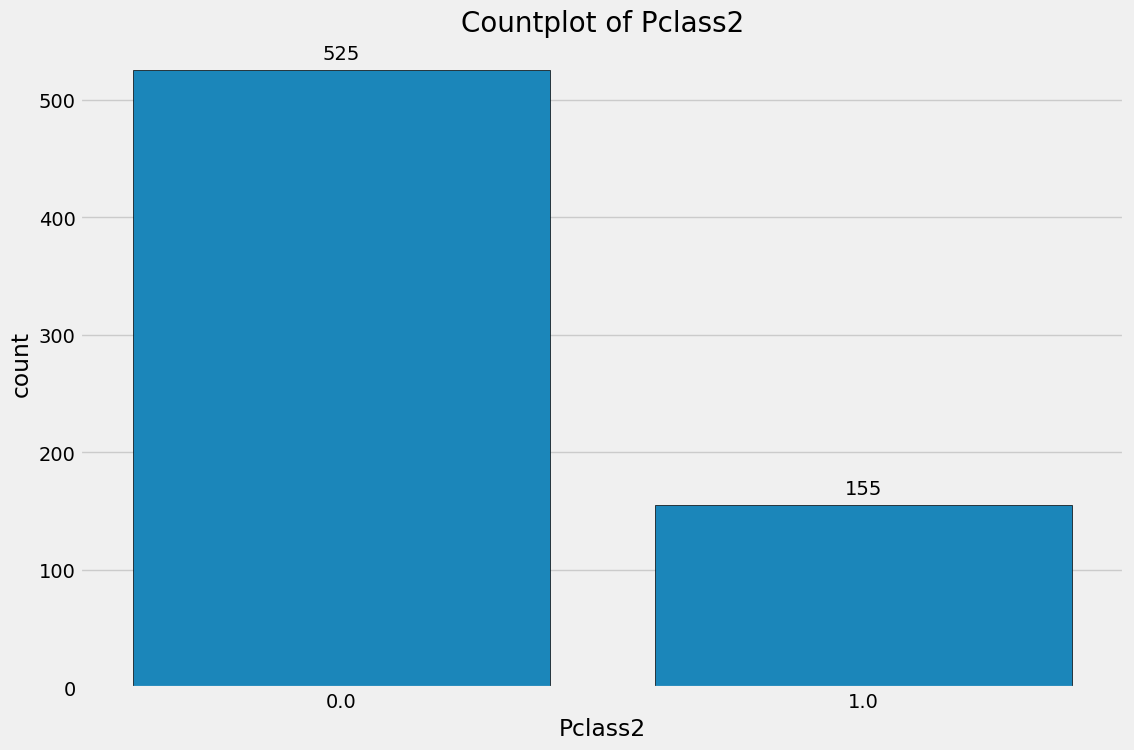

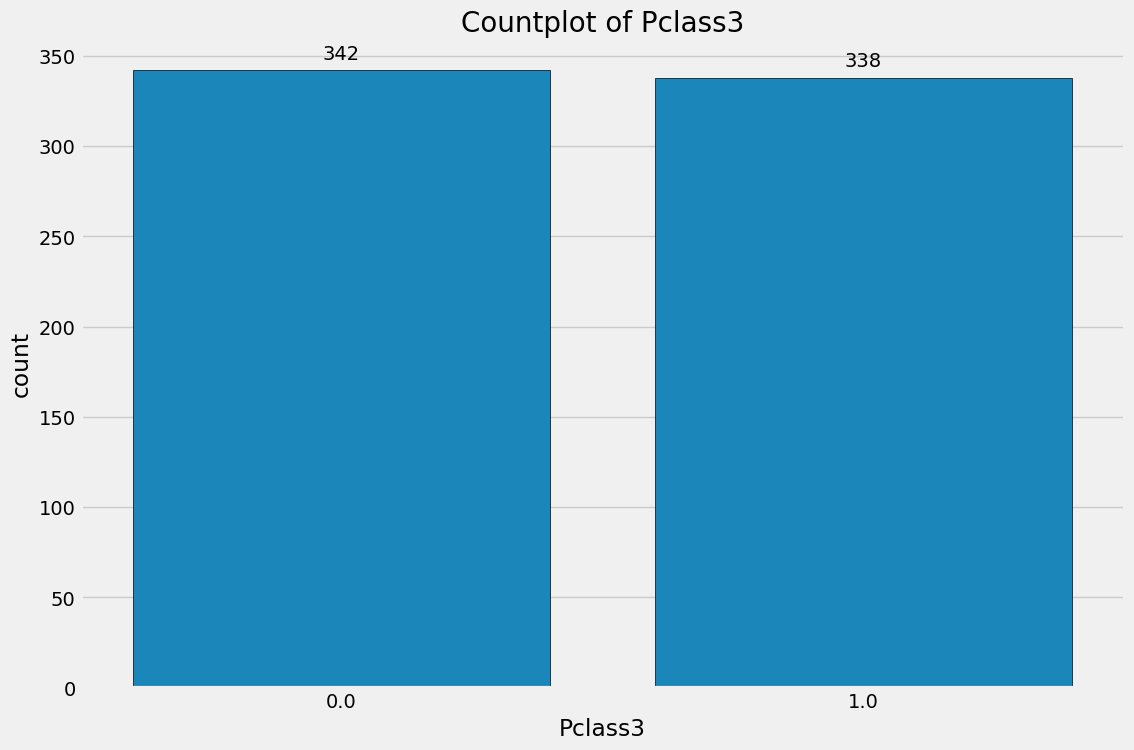

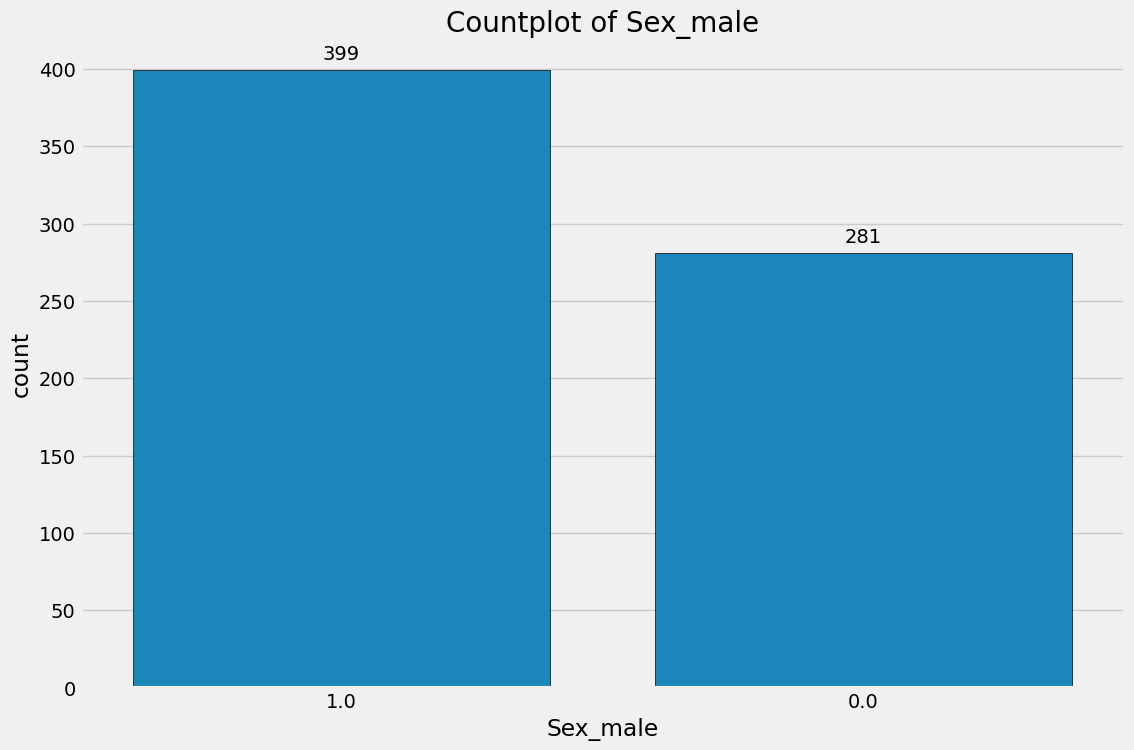

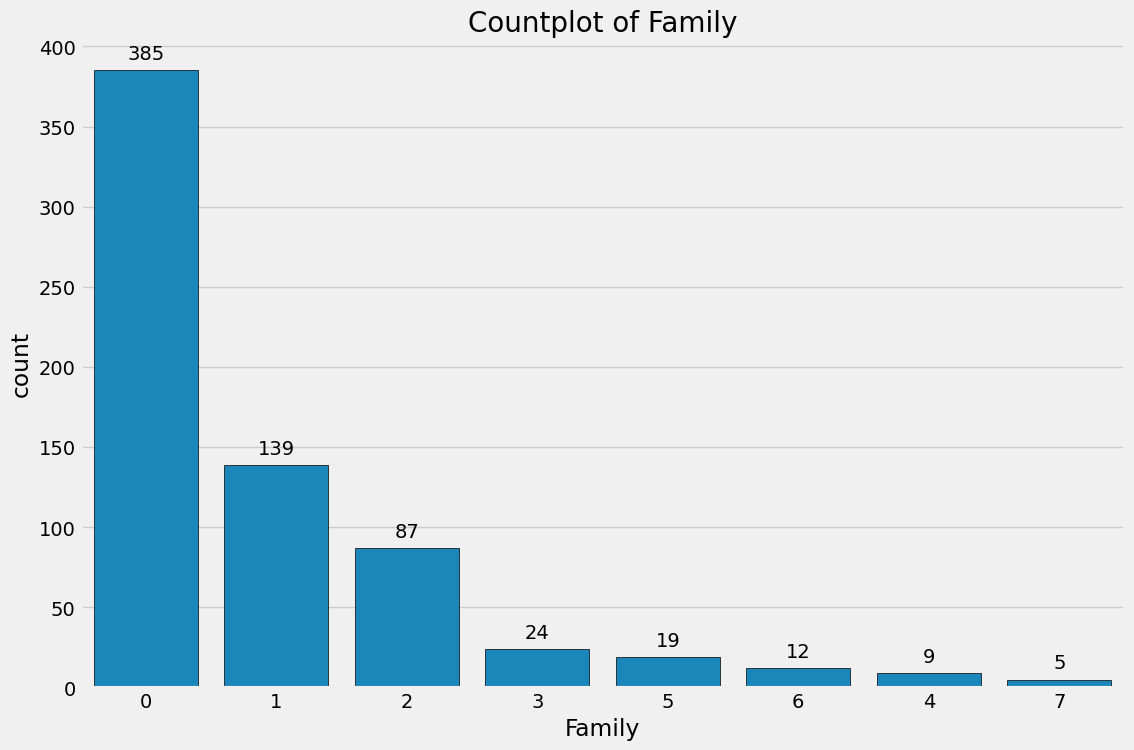

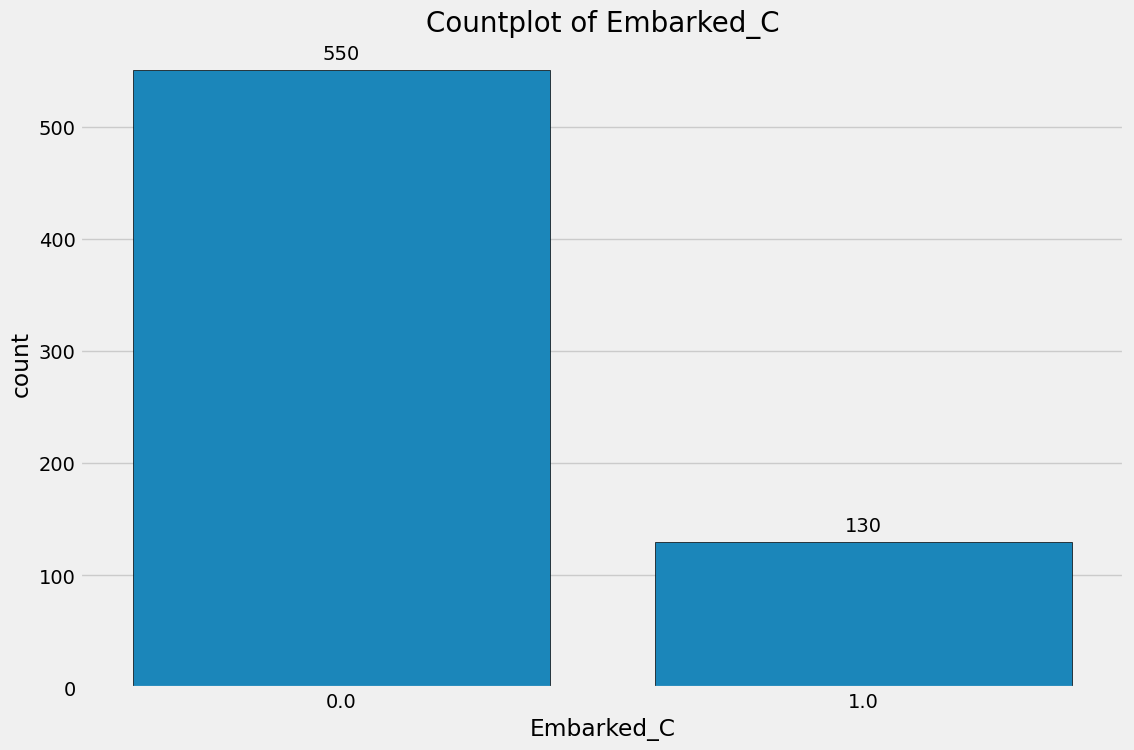

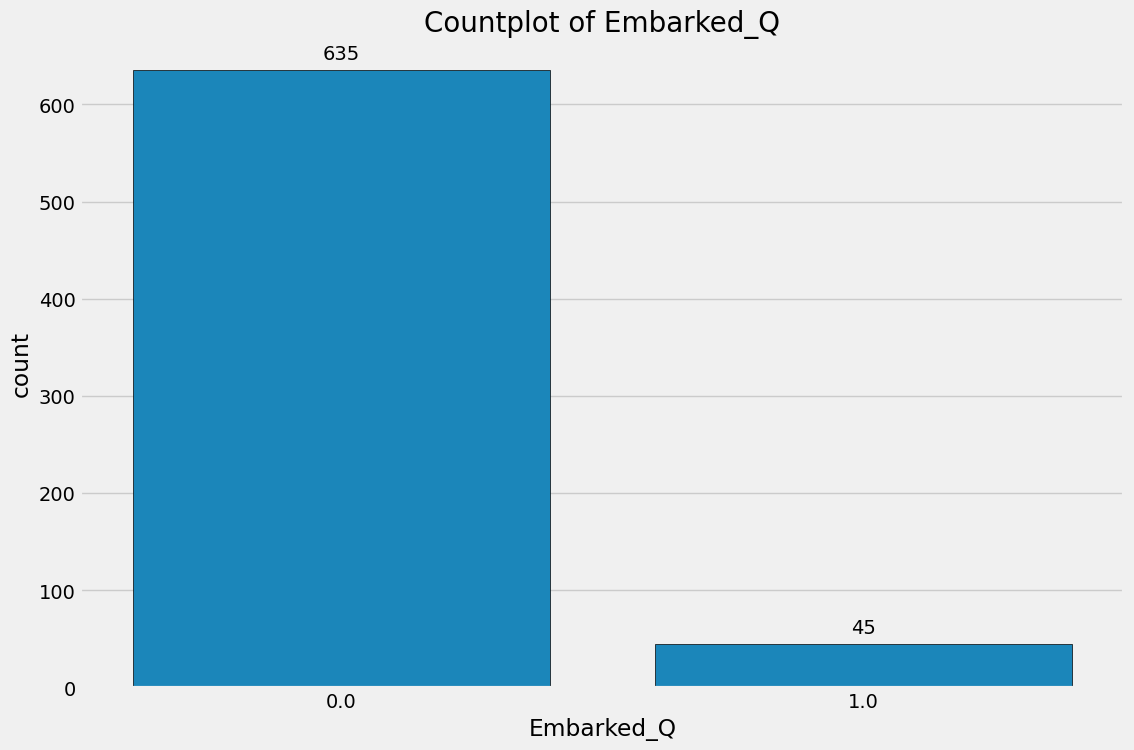

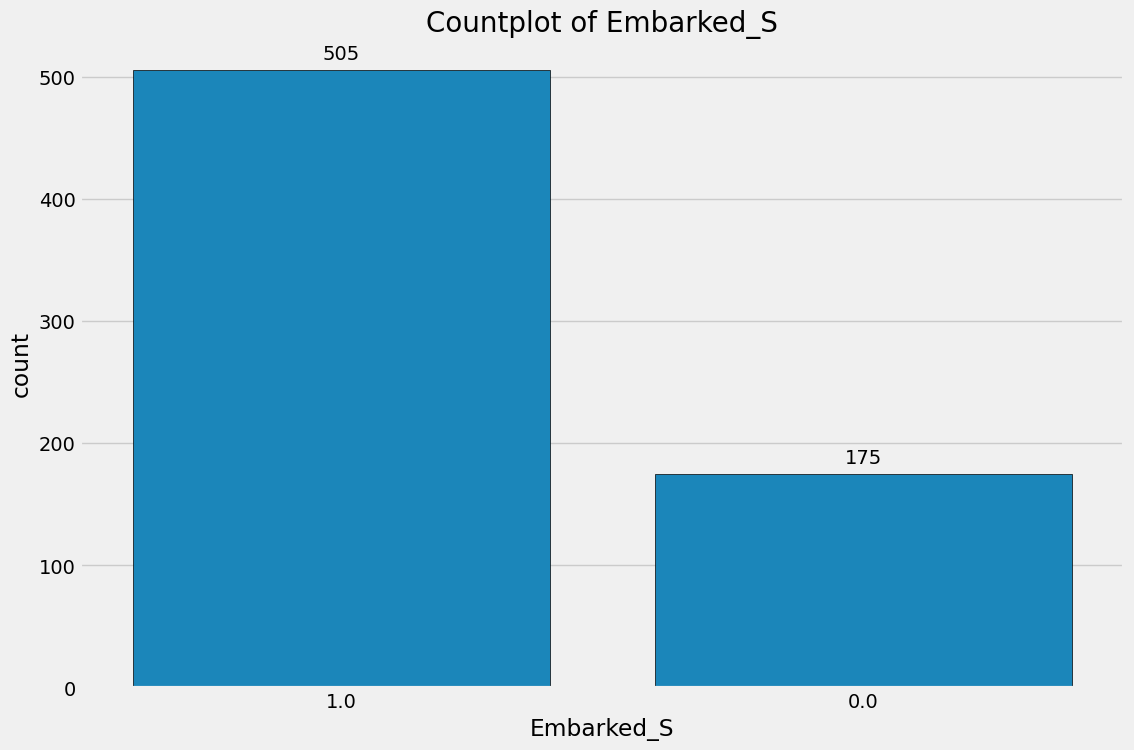

In [21]:
fast_eda(train_data, target='Survived')

In the correlation matrix, it's seem that `Age`, `SibSp`, `Parch` and `Family` have a Pearson coefficient with `survived` very close to 0, so they will not be used to train the model.

In [22]:
# Drop unneeded columns
train_data.drop(columns=['Age', 'SibSp', 'Parch', 'Family'], inplace=True)

DataFrame Head:


Survived     Fare  Pclass1  Pclass2  Pclass3  Sex_male  Embarked_C  \
0         1  15.8500      0.0      0.0      1.0       0.0         0.0   
1         1   7.6500      0.0      0.0      1.0       0.0         0.0   
2         0   7.8875      0.0      0.0      1.0       1.0         0.0   

   Embarked_Q  Embarked_S  
0         0.0         1.0  
1         0.0         1.0  
2         0.0         1.0

DataFrame Tail:


Survived   Fare  Pclass1  Pclass2  Pclass3  Sex_male  Embarked_C  \
677         0   7.75      0.0      0.0      1.0       1.0         0.0   
678         1  71.00      1.0      0.0      0.0       0.0         0.0   
679         0   0.00      1.0      0.0      0.0       1.0         0.0   

     Embarked_Q  Embarked_S  
677         1.0         0.0  
678         0.0         1.0  
679         0.0         1.0

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(680, 9)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    680 non-null    int64  
 1   Fare        680 non-null    float64
 2   Pclass1     680 non-null    float64
 3   Pclass2     680 non-null    float64
 4   Pclass3     680 non-null    float64
 5   Sex_male    680 non-null    float64
 6   Embarked_C  680 non-null    float64
 7   Embarked_Q  680 non-null    float64
 8   Embarked_S  680 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 47.9 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Survived      680
Fare          680
Pclass1       680
Pclass2       680
Pclass3       680
Sex_male      680
Embarked_C    680
Embarked_Q    680
Embarked_S    680
Name: count, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Survived         0.5
Fare          35.4

----------------------------------------------------------------------------------------------------
DataFrame Correlation:



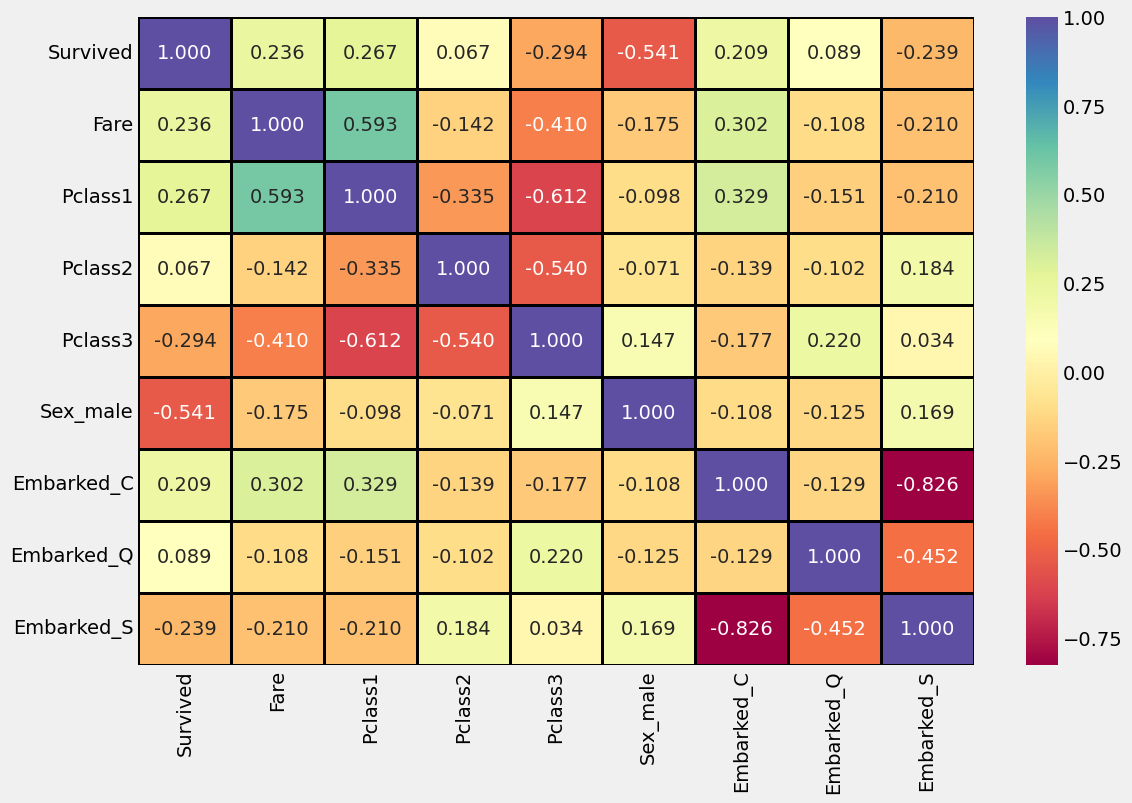

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

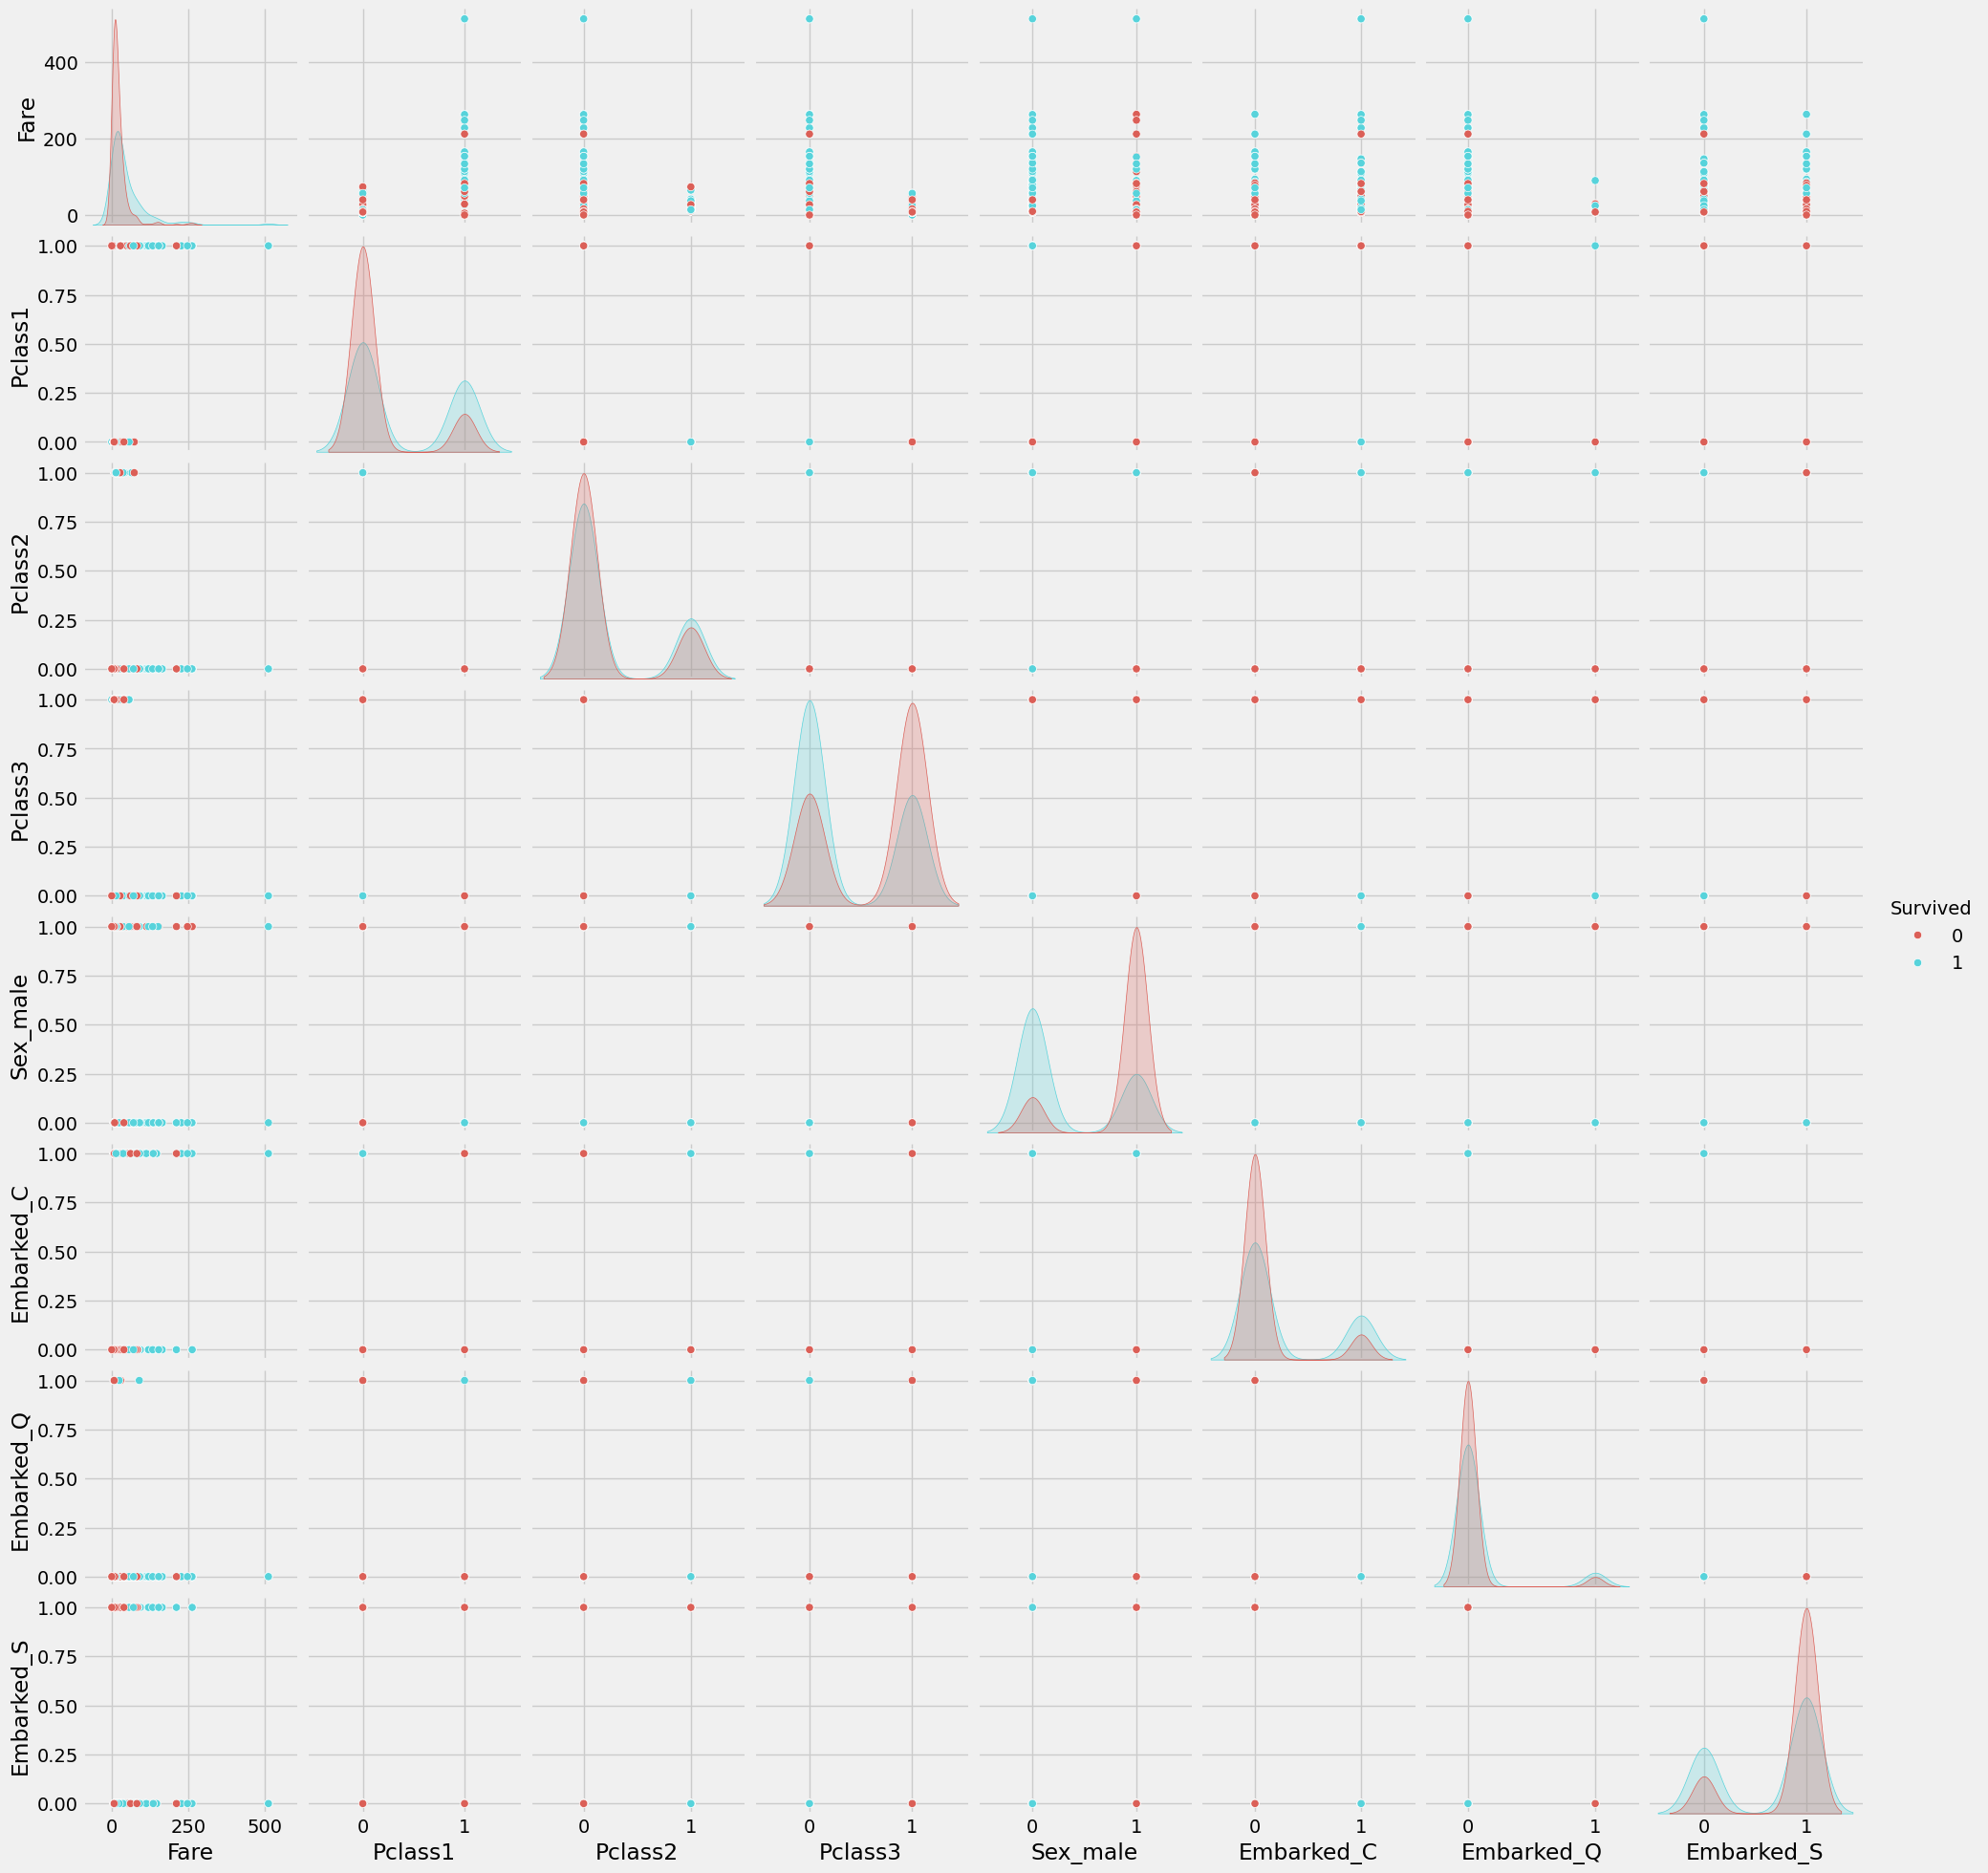

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


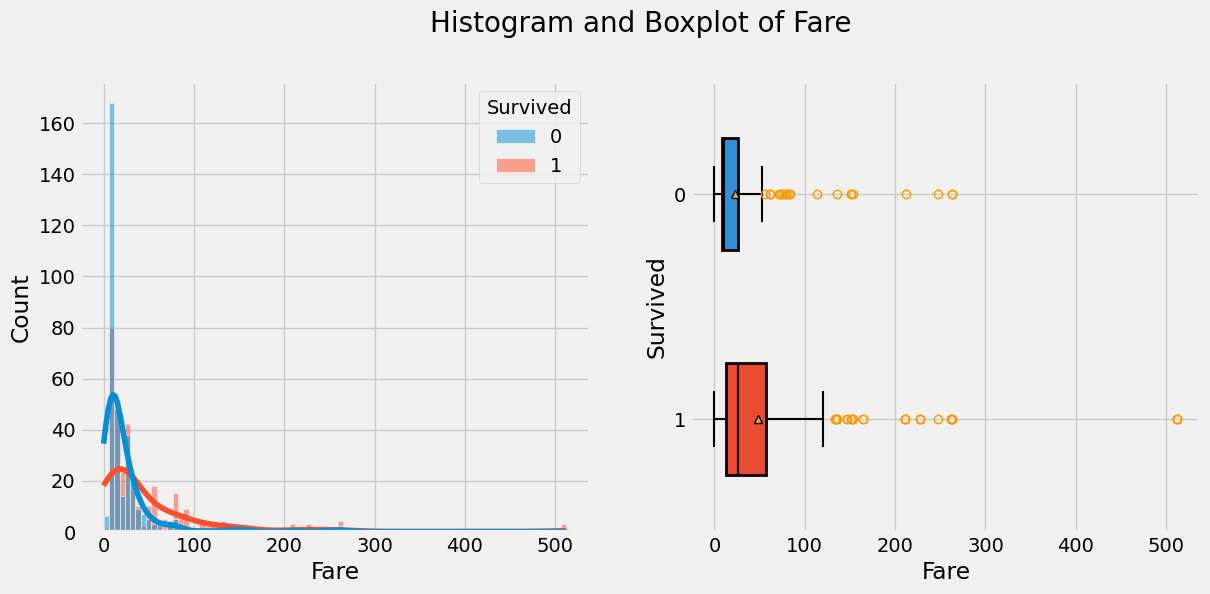

----------------------------------------------------------------------------------------------------
Countplot(s):



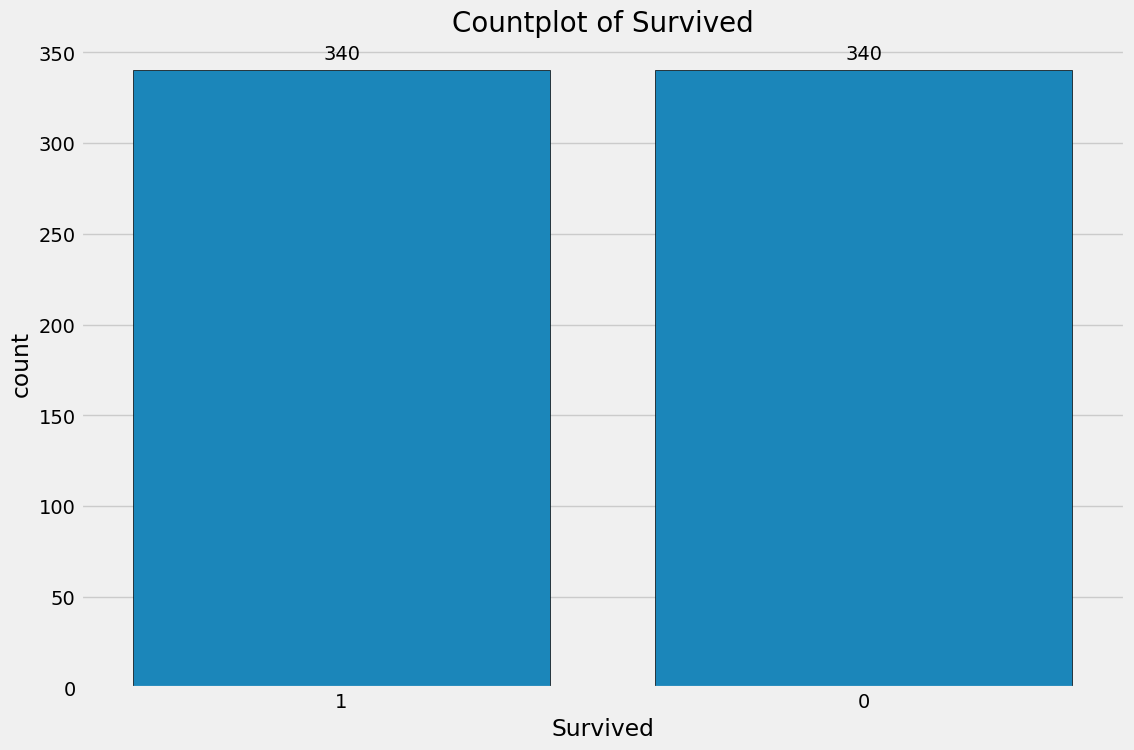

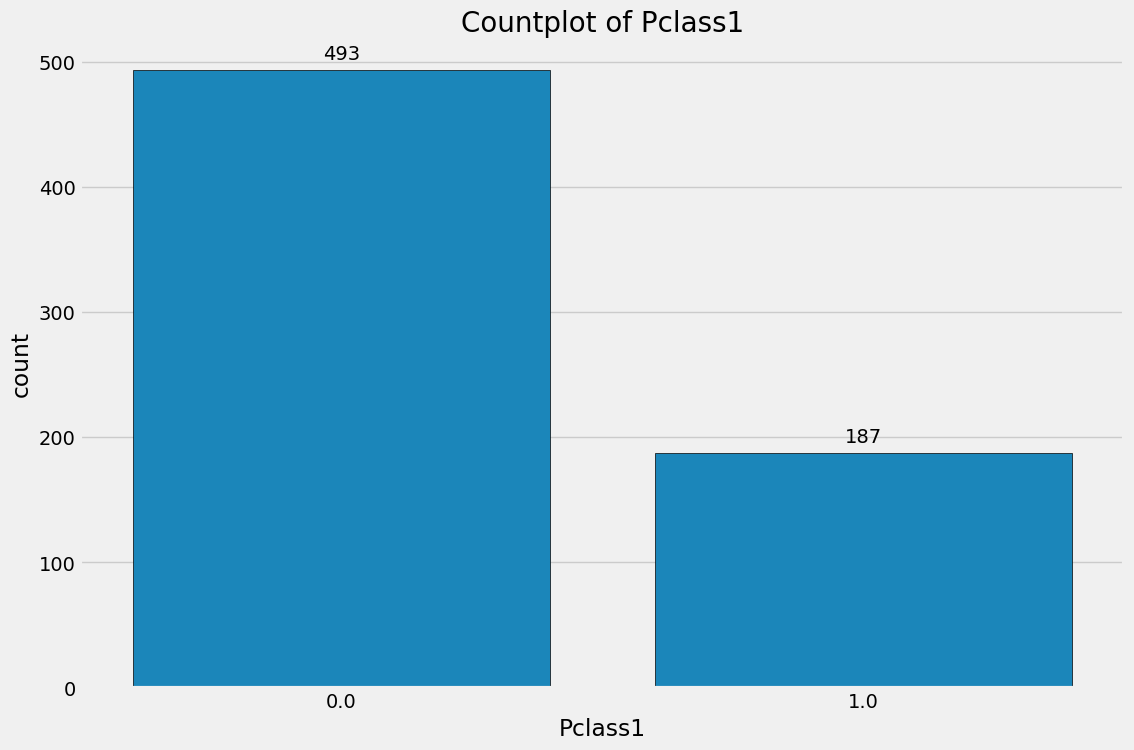

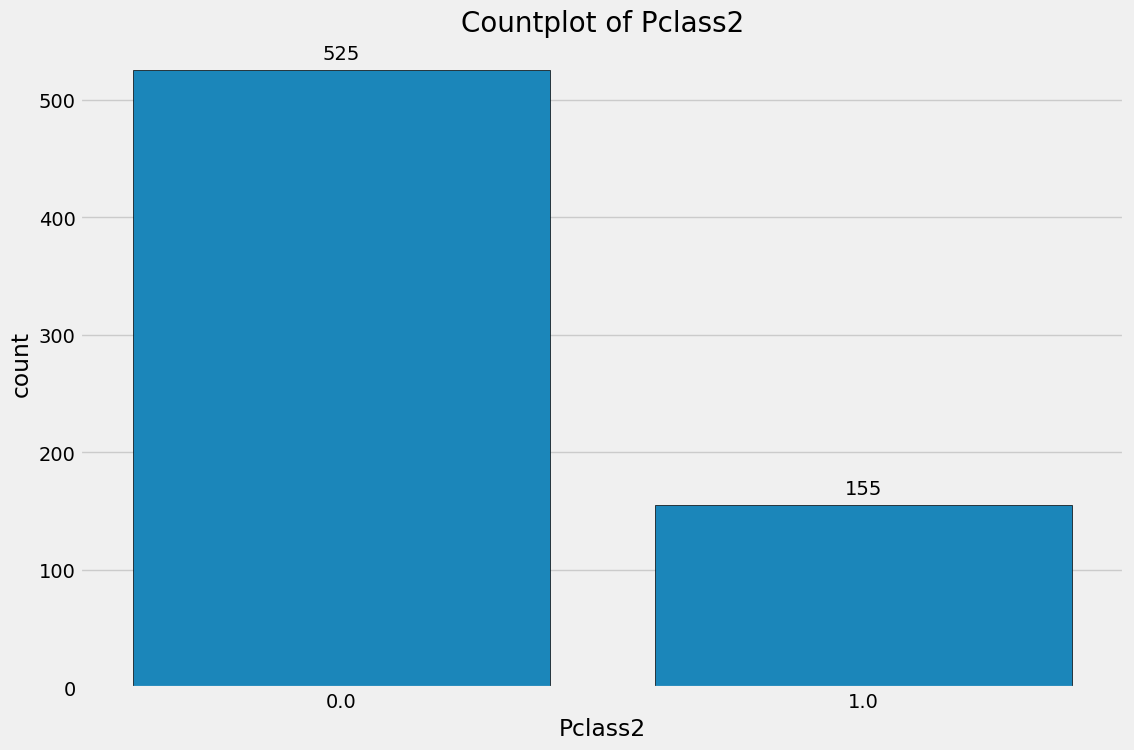

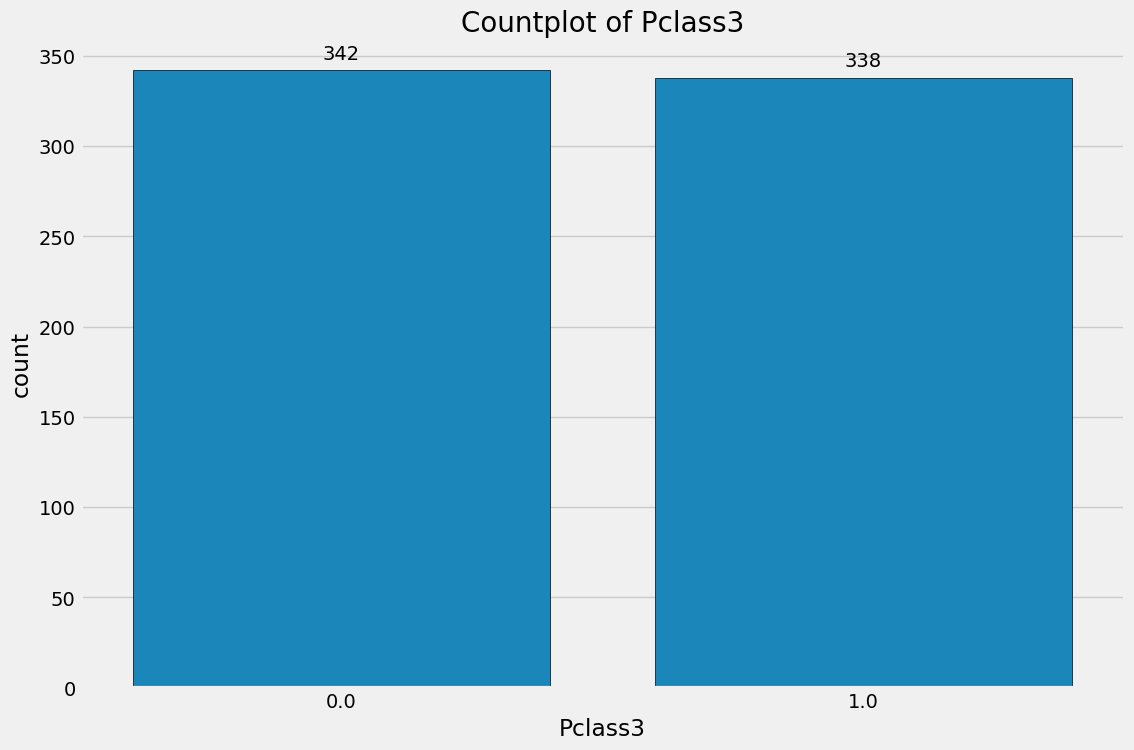

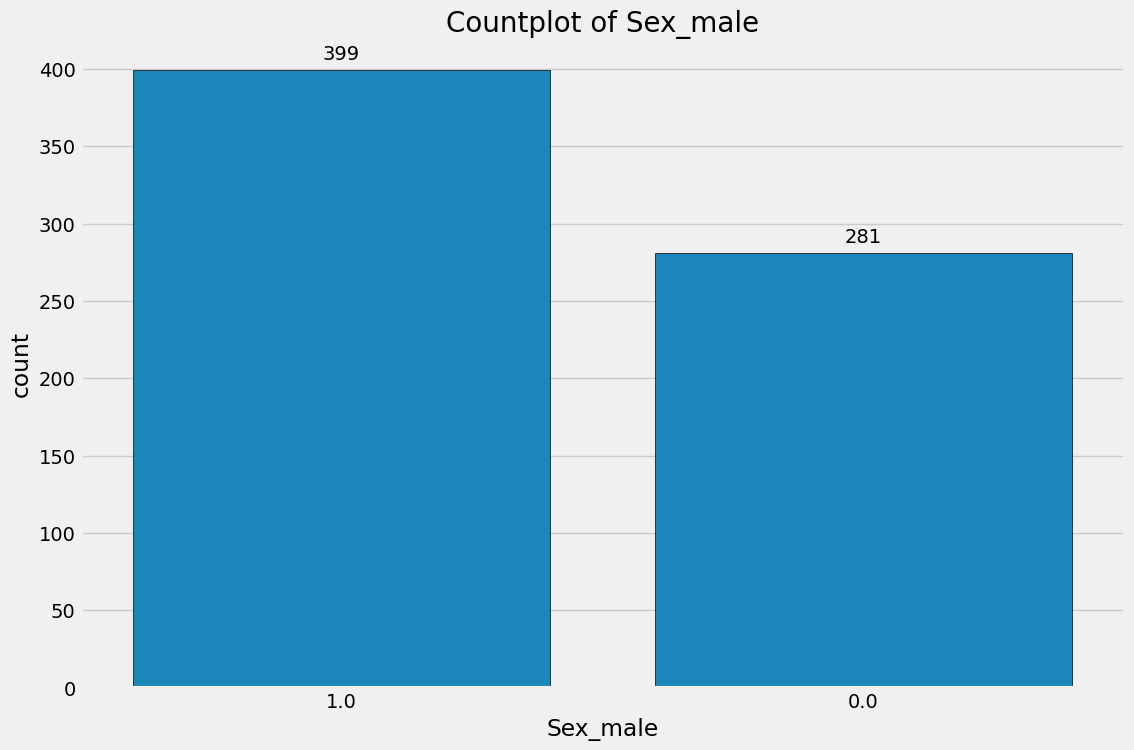

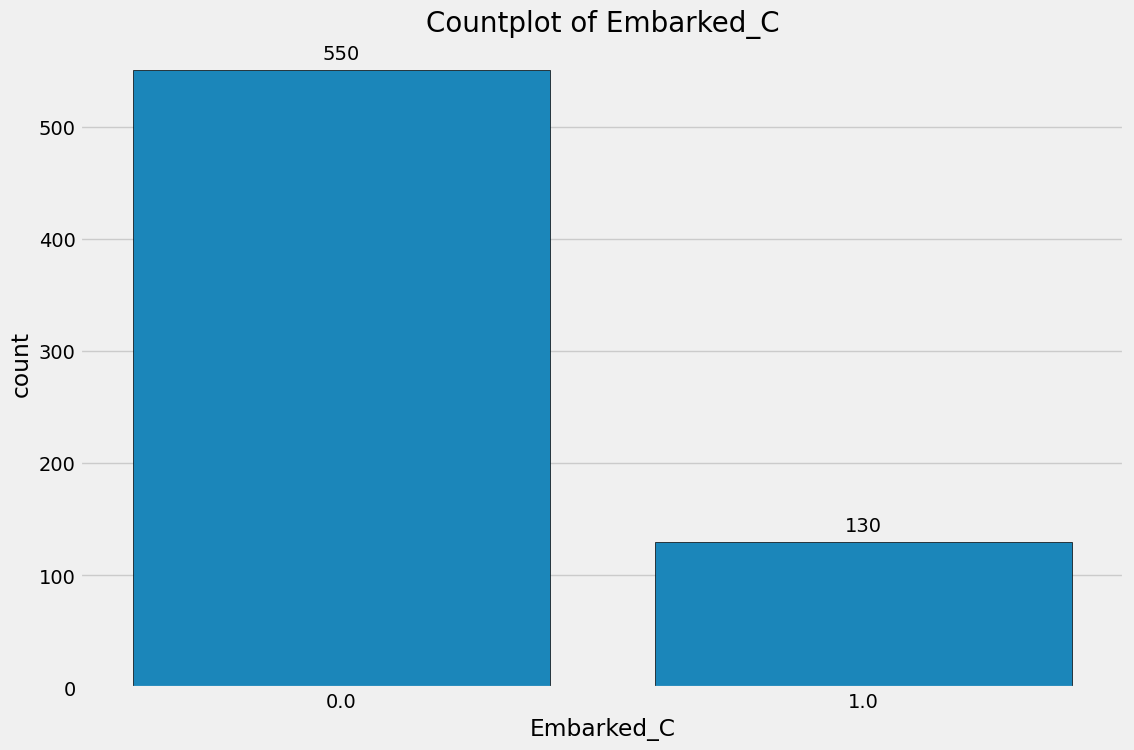

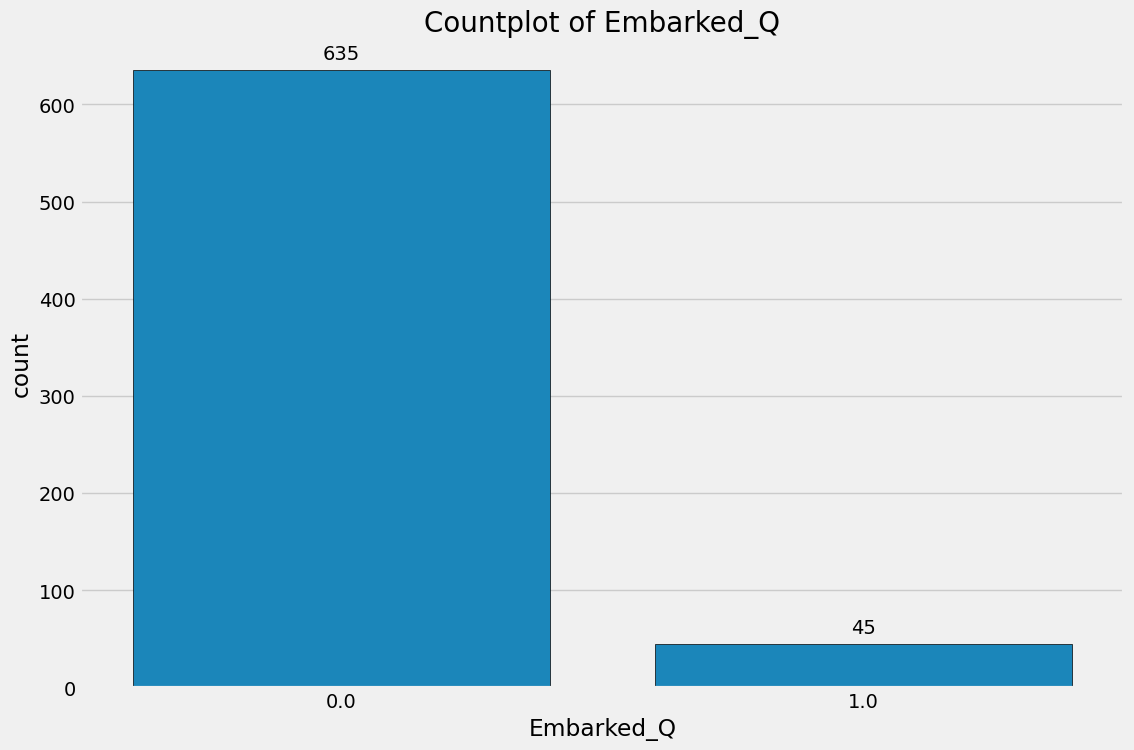

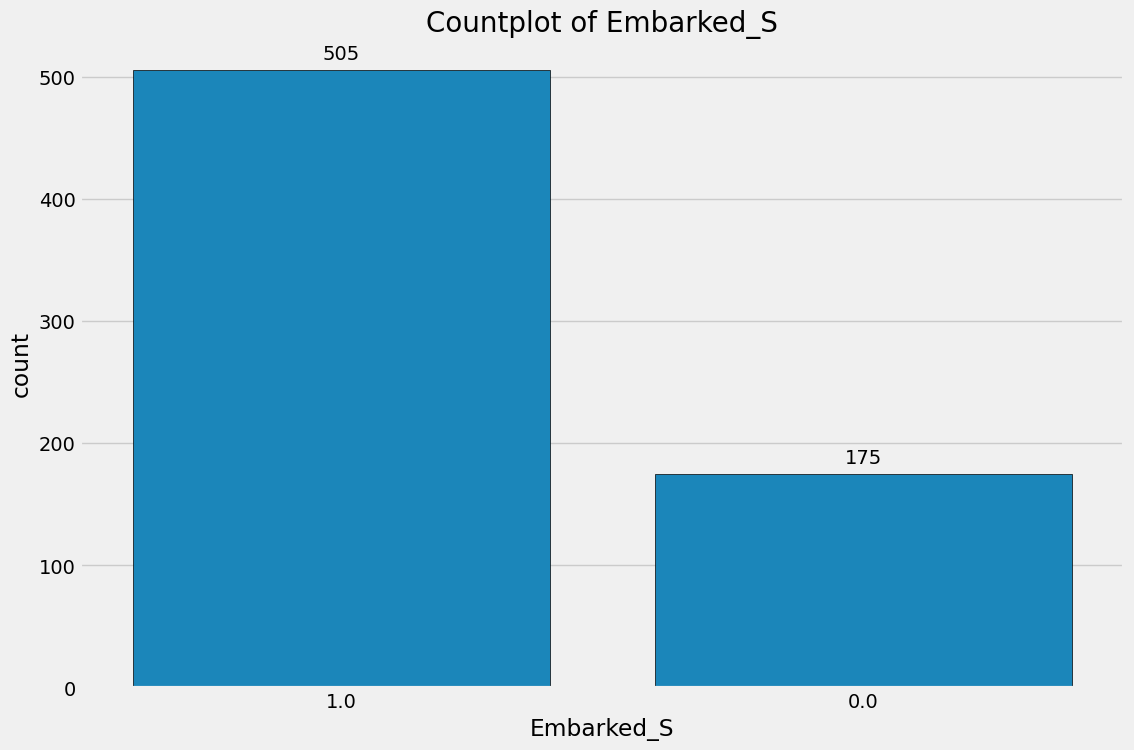

In [23]:
fast_eda(train_data, target='Survived')

Since most of the variables to be used are categorical, the random forest model will be used for training.

## Random Forest

In [24]:
y = train_data['Survived']
X = train_data.drop('Survived', axis=1)

# Initialize the Random Forest classifier
model = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {
    'n_estimators': [10, 20, 50, 100, 200, 500],  # Number of trees in the forest
    'max_features': ['log2', 'sqrt', None],
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'bootstrap': [True, False]  # Method for sampling data points
}

# Run the grid search
grid_obj = GridSearchCV(model, parameters, scoring="accuracy")
grid_obj = grid_obj.fit(X, y)

# Set model to the best combination of parameters
model = grid_obj.best_estimator_

# Train the model using the training sets
model.fit(X, y)

RandomForestClassifier(max_depth=6, max_features='log2')

#### RandomForestClassifier
RandomForestClassifier(criterion='entropy', max_depth=8, max_features=None,
                       n_estimators=50)

## Export data and test model

In [25]:
# Fit the test with the format of the model
X_test = test_data[['Fare', 'Pclass', 'Sex',	'Embarked']]

# Pclass
enc1 = OneHotEncoder(handle_unknown='ignore', drop=None)
encoded_Pclass = enc1.fit_transform(X_test[['Pclass']]).toarray()
encoded_Pclass = pd.DataFrame(encoded_Pclass, columns=['Pclass' + str(int(x)) for x in enc1.categories_[0]])
X_test = pd.concat([X_test, encoded_Pclass], axis=1)
X_test.drop(columns='Pclass', inplace=True)

# Sex
enc1 = OneHotEncoder()
encoded_Sex = enc1.fit_transform(X_test[['Sex']]).toarray()
encoded_Sex = pd.DataFrame(encoded_Sex, columns=['Sex_' + str(x) for x in enc1.categories_[0]])
X_test = pd.concat([X_test, encoded_Sex], axis=1)
X_test.drop(columns=['Sex', 'Sex_female'], inplace=True)

# Embarked
enc1 = OneHotEncoder()
encoded_Embarked  = enc1.fit_transform(X_test[['Embarked']]).toarray()
encoded_Embarked = pd.DataFrame(encoded_Embarked, columns=['Embarked_' + str(x) for x in enc1.categories_[0]])
X_test = pd.concat([X_test, encoded_Embarked], axis=1)
X_test.drop(columns=['Embarked'], inplace=True)

In [26]:
# Generate predictions (probabilities)
predictions = model.predict(X_test)

# Convert probabilities to binary outcomes (0 or 1)
predictions = (predictions > 0.5).astype(int)

# Flatten the predictions to ensure it's a 1D array
predictions = predictions.flatten()

# Assuming 'test_data' is your original test dataset with 'PassengerId' column
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})

# Save the output to a CSV file
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!


Score: 0.76